In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
import netCDF4 as nc4
import scipy.io as sio
import cmaps
from matplotlib.colors import LinearSegmentedColormap
import datetime

In [11]:
OUTPUT_dir = '/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/workspace_geopolarsst/STORAGE'
Inpb_dir = OUTPUT_dir + '/posterior'
# Inpa_dir = OUTPUT_dir + '/posterior'
# Inpn_files =  ['/Volumes/Elements SE/roms4dvar_ecs/freerun_detide/ocean_ecsdtd_avg_'\
#              +str(i).rjust(4,'0')+'.nc' for i in range(289,293)]

In [12]:
Inpb_dir

'/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/workspace_geopolarsst/STORAGE/posterior'

In [16]:
Inpb_ds = xr.open_mfdataset(Inpb_dir+'/ocean_ecs_qck*.nc',combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            parallel=True)
# Inpb_ds = xr.open_mfdataset(Inpb_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
#                             coords='minimal',compat='override',concat_dim='ocean_time',\
#                             data_vars=['temp','salt','u','v','zeta'],parallel=True)
# Inpa_ds = xr.open_mfdataset(Inpa_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
#                             coords='minimal',compat='override',concat_dim='ocean_time',\
#                             data_vars=['temp','salt','u','v','zeta'],parallel=True)

# Inpn_ds = xr.open_mfdataset(Inpn_files,combine='nested',\
#                             coords='minimal',compat='override',concat_dim='ocean_time',\
#                             data_vars=['temp','salt','u','v','zeta'],parallel=True)
# Inpb_ds


In [4]:
Grd_ds = xr.open_dataset('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/workspace_geopolarsst/DATA/ECSLDHY_grd_v11_sponge_drggrd.nc')
Grd_ds

<xarray.Dataset>
Dimensions:      (one: 1, two: 2, bath: 0, eta_rho: 362, xi_rho: 242,
                  eta_psi: 361, xi_psi: 241, eta_u: 362, xi_u: 241, eta_v: 361,
                  xi_v: 242)
Coordinates:
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_rho      (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: one, two, bath, eta_rho, xi_rho, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/45)
    xl           (one) float64 ...
    el           (one) float64 ...
    JPRJ         (two) |S1 ...
    PLAT         (two) float32 ...
    PLONG        (one) float32 ...
    ROTA         (one) float32 ...
    ...           ...
    mask_v       (eta_v, xi_v) float64 ...
    mask_psi     (eta_psi, xi_psi) float64 ...
    angle        (eta_rho, xi_rho) float64 ...
    visc_factor  (eta_rho, xi_rho) float64 ...
    diff_factor  (eta_rho, xi_rho) float64 ...
    rdrag2       (eta_rho, xi_rho) float64 ...
Attributes:
    type:         Gridpak file
    gridid:       ROMS Model Grid
    history:      Created by "mat2roms_rps" on 25-Oct-2011 13:14:51
    CPP-options:  DCOMPLEX, DBLEPREC, NCARG_32, PLOTS,
    sponge:       23-Jan-2024 created with /Volumes/Elements SE/roms4dvar_ecs...

In [6]:
NRMI_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace/DATA/nrm/ecs_nrm_i_jan_rand.nc')
NRMI_ds

<xarray.Dataset>
Dimensions:         (tracer: 2, Nstate: 11, boundary: 4, s_rho: 20, s_w: 21,
                     Nuser: 1, eta_rho: 362, xi_rho: 242, eta_u: 362,
                     xi_u: 241, eta_v: 361, xi_v: 242, eta_psi: 361,
                     xi_psi: 241, ocean_time: 1)
Coordinates:
  * s_rho           (s_rho) float64 -0.975 -0.925 -0.875 ... -0.075 -0.025
  * s_w             (s_w) float64 -1.0 -0.95 -0.9 -0.85 ... -0.15 -0.1 -0.05 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2017-12-31
Dimensions without coordinates: tracer, Nstate, boundary, Nuser, eta_rho,
                                xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi,
                                xi_psi
Data variables: (12/127)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    ubar            (ocean_time, eta_u, xi_u) float64 ...
    vbar            (ocean_time, eta_v, xi_v) float64 ...
    u               (ocean_time, s_rho, eta_u, xi_u) float64 ...
    v               (ocean_time, s_rho, eta_v, xi_v) float64 ...
    temp            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    salt            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
Attributes: (12/46)
    file:              ./ecs_nrm_i_jan_rand.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS initial conditions error covariance norm file
    title:             Hydrological model in East China Sea
    var_info:          /home/rongzr/ygli/roms_ecs/4dvar/norm02/External/varin...
    ...                ...
    compiler_command:  /home/SystemSoftware/intel2017/compilers_and_libraries...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            018x020
    history:           ROMS/TOMS, Version 4.1, Saturday - January 20, 2024 - ...
    ana_file:          ROMS/Functionals/ana_initial.h
    CPP_options:       ECS, ADD_FSOBC, ADD_M2OBC, ADJOINT, ADJUST_BOUNDARY, A...

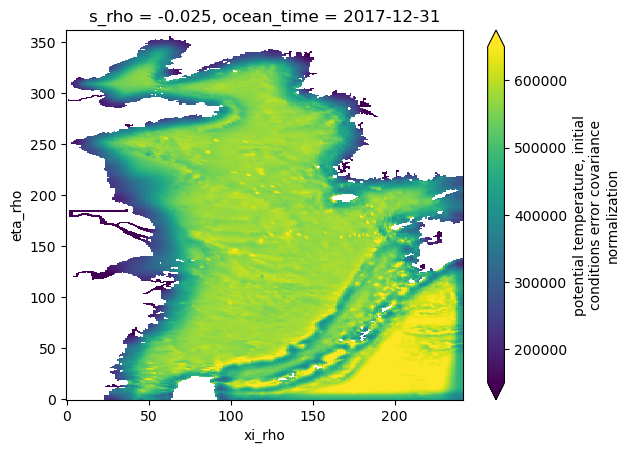

In [7]:
nrmi_sst_ecs = NRMI_ds.temp.isel(s_rho=-1).data
NRMI_ds.temp.isel(s_rho=-1).plot(vmin = 1.5e5,vmax = 6.5e5)

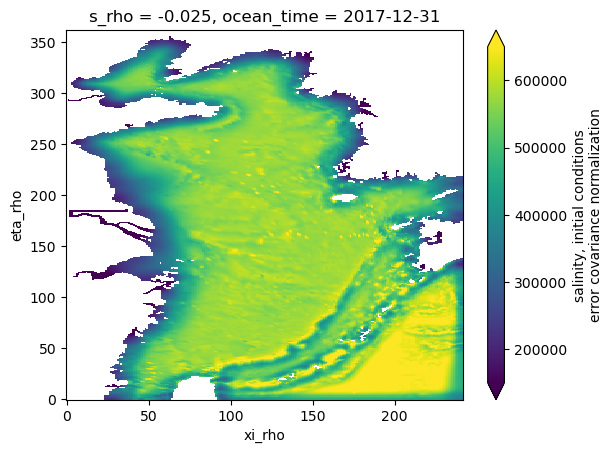

In [8]:
nrmi_sss_ecs = NRMI_ds.salt.isel(s_rho=-1).data
NRMI_ds.salt.isel(s_rho=-1).plot(vmin = 1.5e5,vmax = 6.5e5)

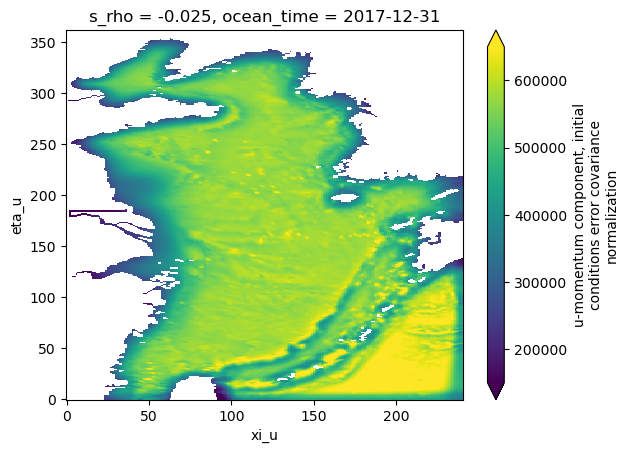

In [9]:
nrmi_u_ecs = NRMI_ds.u.isel(s_rho=-1).data
NRMI_ds.u.isel(s_rho=-1).plot(vmin = 1.5e5,vmax = 6.5e5)

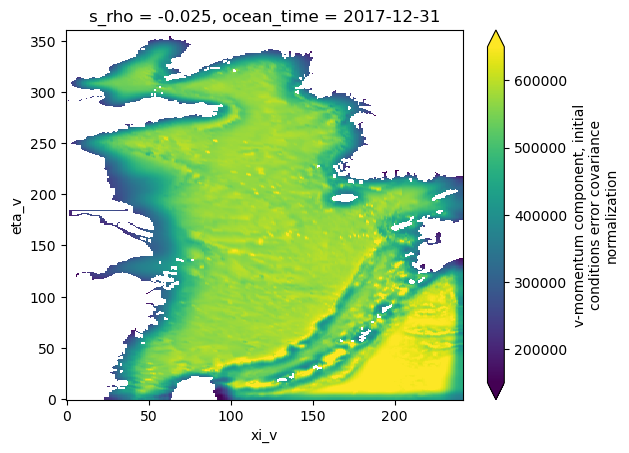

In [10]:
nrmi_v_ecs = NRMI_ds.v.isel(s_rho=-1).data
NRMI_ds.v.isel(s_rho=-1).plot(vmin = 1.5e5,vmax = 6.5e5)

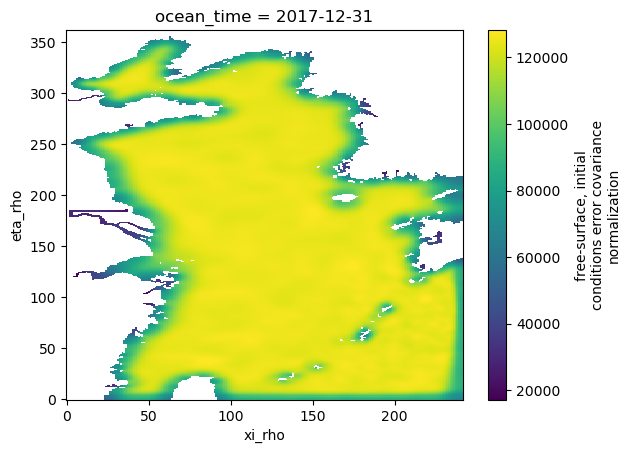

In [11]:
nrmi_zeta_ecs = NRMI_ds.zeta.data
NRMI_ds.zeta.plot()

In [11]:
# STDI_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace/DATA/std/ecsdtd_std_i_jan.nc')
# STDI_ds = xr.open_dataset('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/bg_std/ecs_std_i_v4sc_1.nc',decode_times=False)
STDI_ds = nc4.Dataset('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/bg_std/roms_ecs_v4sc_std_i_1.nc')
STDI_ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    type: 4D-Var error covariance standard deviation
    author: onecountrylee
    history: Created on Sat, August 10, 2024 at 21:43
    title: std from roms_ecs v4.1 SCORRECTION
    dimensions(sizes): xi_rho(242), xi_u(241), xi_v(242), eta_rho(362), eta_u(362), eta_v(361), s_rho(20), ocean_time(1)
    variables(dimensions): float64 ocean_time(ocean_time), float64 zeta(ocean_time, eta_rho, xi_rho), float64 ubar(ocean_time, eta_u, xi_u), float64 vbar(ocean_time, eta_v, xi_v), float64 u(ocean_time, s_rho, eta_u, xi_u), float64 v(ocean_time, s_rho, eta_v, xi_v), float64 temp(ocean_time, s_rho, eta_rho, xi_rho), float64 salt(ocean_time, s_rho, eta_rho, xi_rho)
    groups: 

In [12]:
stdi_sst_ecs = STDI_ds.temp.isel(s_rho=-1).data
STDI_ds.temp.isel(s_rho=-1).plot(vmin = 0,vmax = 2)

AttributeError: NetCDF: Attribute not found

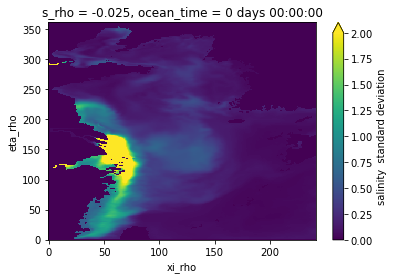

In [23]:
stdi_sss_ecs = STDI_ds.salt.isel(s_rho=-1).data
STDI_ds.salt.isel(s_rho=-1).plot(vmin = 0,vmax = 2)

In [24]:
stdi_u_ecs = STDI_ds.u.isel(s_rho=-1).data
STDI_ds.u.data.shape

(1, 20, 362, 241)

In [25]:
stdi_v_ecs = STDI_ds.v.isel(s_rho=-1).data
STDI_ds.v

<xarray.DataArray 'v' (ocean_time: 1, s_rho: 20, eta_v: 361, xi_v: 242)>
[1747240 values with dtype=float64]
Coordinates:
  * s_rho       (s_rho) float64 -0.975 -0.925 -0.875 ... -0.125 -0.075 -0.025
    lon_v       (eta_v, xi_v) float64 117.8 117.8 117.9 ... 129.6 129.6 129.7
    lat_v       (eta_v, xi_v) float64 25.06 25.04 25.02 ... 39.44 39.44 39.43
  * ocean_time  (ocean_time) timedelta64[ns] 00:00:00
Dimensions without coordinates: eta_v, xi_v
Attributes:
    long_name:  v-momentum component standard deviation
    units:      meter second-1
    time:       ocean_time

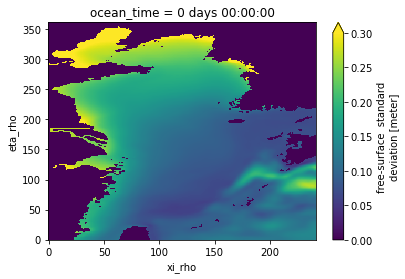

In [26]:
stdi_zeta_ecs = STDI_ds.zeta.data
STDI_ds.zeta.plot(vmin = 0,vmax = 0.3)

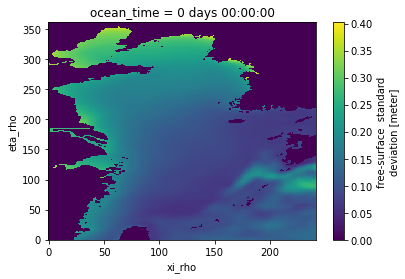

In [27]:
stdi_zeta_ecs = STDI_ds.zeta.data
STDI_ds.zeta.plot()

In [17]:
bath_ecs = Inpb_ds.h.data.compute()
# visc_ecs = Grd_ds.visc_factor.data
mask_ecs = Inpb_ds.mask_rho.data.compute()
umask_ecs = Inpb_ds.mask_u.data.compute()
vmask_ecs = Inpb_ds.mask_v.data.compute()
rlon2d = Inpb_ds.lon_rho.compute()
rlat2d = Inpb_ds.lat_rho.compute()


In [29]:
ulon2d = Inpb_ds.lon_u.compute()
ulat2d = Inpb_ds.lat_u.compute()
vlon2d = Inpb_ds.lon_v.compute()
vlat2d = Inpb_ds.lat_v.compute()

In [16]:
my_haxby_color = cmaps.GMT_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[-1:0:-1][1:] , N = 256)
my_bath_color = cmaps.MPL_YlGnBu.colors
my_bath = LinearSegmentedColormap.from_list('lavergne',my_bath_color[-1:0:-1][:] , N = 256)
bounds = np.array([-5000,-2000,-500,-100,-25,-5])


def _forward(x):
    return -np.log(-x)


def _inverse(x):
    return -1./np.exp(x)
norm = colors.FuncNorm((_forward, _inverse), vmin=-5000, vmax=-5)

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/var/folders/1q/hs896xlj3djcy9rs8_c7zdmc0000gn/T/ipykernel_96842/3146037423.py:9: RuntimeWarning: invalid value encountered in log
  return -np.log(-x)
posx and posy should be finite values


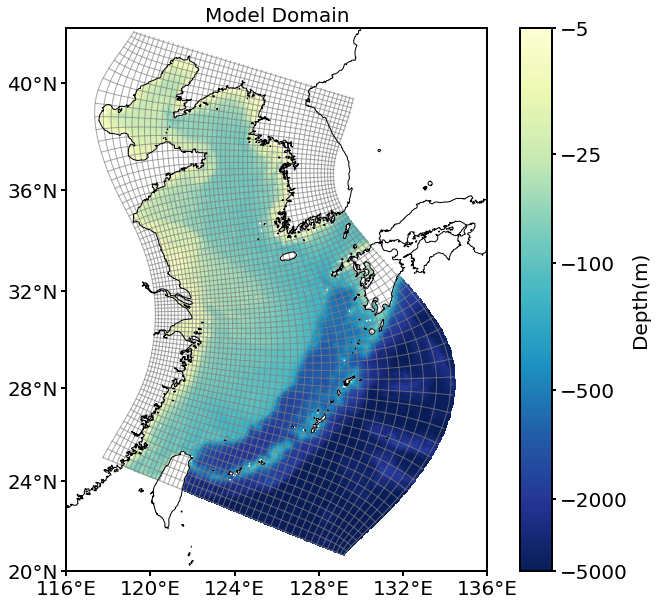

In [35]:
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'k',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='w',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('Model Domain',fontsize=20)

bath_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,-bath_ecs,norm = norm,cmap=my_bath,transform = ccrs.PlateCarree(),zorder=-2)

for i in range(0,rlon2d.shape[0],5):
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
for i in range(0,rlon2d.shape[1],5):
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks = np.array([-5,-25,-100,-500,-2000,-5000]))
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
cb.set_label("Depth(m)",fontsize = 20) 
# plt.savefig('bath_roms_ecs.pdf',bbox_inches='tight')
plt.savefig('bath_roms_ecs.jpeg',bbox_inches='tight',dpi=1200)

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/var/folders/1q/hs896xlj3djcy9rs8_c7zdmc0000gn/T/ipykernel_96842/3146037423.py:9: RuntimeWarning: invalid value encountered in log
  return -np.log(-x)
posx and posy should be finite values


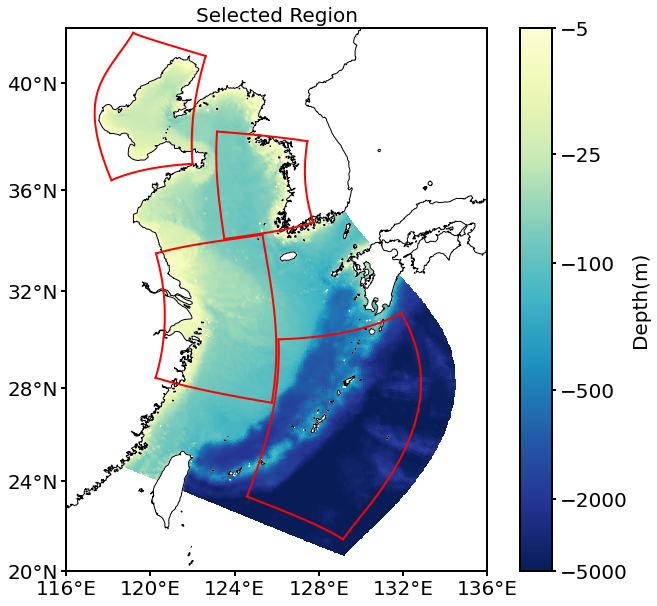

In [32]:
lon_bdy = [116,136];
lat_bdy = [20,42];
suffix = 'nonud'
varname = 'temp'
areas = ['cre','ys','bh','ks'];
titles = ['ChangJiang River Estuary(CRE)','South Yellow Sea(YS)',
         'BoHai Sea(BH)','Kuroshio Current(KS)'];
my_root = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs';
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'k',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='w',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('Selected Region',fontsize=20)

bath_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,-bath_ecs,norm = norm,cmap=my_bath,transform = ccrs.PlateCarree(),zorder=-2)
iwda = 0
for i, area in enumerate(areas):
    # Var_file = my_root + '/Inp_' + area + '_' + suffix +'_' + varname +'.mat'
    # VAR_dict = sio.loadmat(Var_file)
    # if varname == 'salt' or varname == 'temp':
    #     lon = VAR_dict['rlon'].squeeze()
    #     lat = VAR_dict['rlat'].squeeze()
    ax.plot(daa_Vars[area][iwda].lon[:,0], daa_Vars[area][iwda].lat[:,0], color = 'r',linewidth = 2,transform=ccrs.PlateCarree(),zorder = 3)
    ax.plot(daa_Vars[area][iwda].lon[:,-1], daa_Vars[area][iwda].lat[:,-1], color = 'r',linewidth = 2,transform=ccrs.PlateCarree(),zorder = 3)
    ax.plot(daa_Vars[area][iwda].lon[-1,:], daa_Vars[area][iwda].lat[-1,:], color = 'r',linewidth = 2,transform=ccrs.PlateCarree(),zorder = 3)
    ax.plot(daa_Vars[area][iwda].lon[0,:], daa_Vars[area][iwda].lat[0,:], color = 'r',linewidth = 2,transform=ccrs.PlateCarree(),zorder = 3)
# for i in range(0,rlon2d.shape[0],5):
#     plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
# for i in range(0,rlon2d.shape[1],5):
#     plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks = np.array([-5,-25,-100,-500,-2000,-5000]))
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
cb.set_label("Depth(m)",fontsize = 20) 
# plt.savefig('subregion_roms_ecs_new.pdf',bbox_inches='tight')
plt.savefig('subregion_roms_ecs_new.jpeg',dpi=1200,bbox_inches='tight')

In [27]:
daa_Vars['ys']

TypeError: list indices must be integers or slices, not str

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


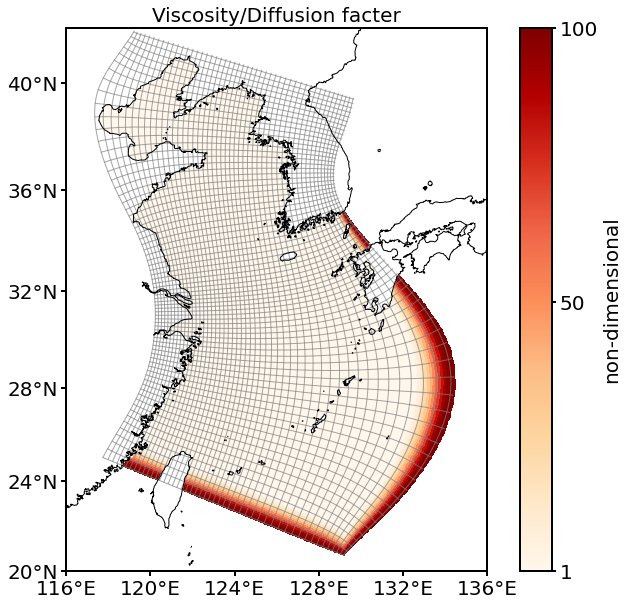

In [34]:
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'k',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='w',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('Viscosity/Diffusion facter',fontsize=20)
visc_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,visc_ecs,cmap='OrRd',transform = ccrs.PlateCarree(),zorder=-2)
for i in range(0,rlon2d.shape[0],5):
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
for i in range(0,rlon2d.shape[1],5):
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'grey',transform = ccrs.PlateCarree(),linewidth = 1,alpha = 0.7,zorder=0)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks = [1,50,100])
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
cb.set_label("non-dimensional",fontsize = 20) 
# plt.savefig('spongelayer_roms_ecs.pdf',bbox_inches='tight')
plt.savefig('spongelayer_roms_ecs.jpeg',bbox_inches='tight',dpi=1200)

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/var/folders/1q/hs896xlj3djcy9rs8_c7zdmc0000gn/T/ipykernel_21237/3485919394.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  position.set_yticklabels([1,2,3,4,5,6])
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


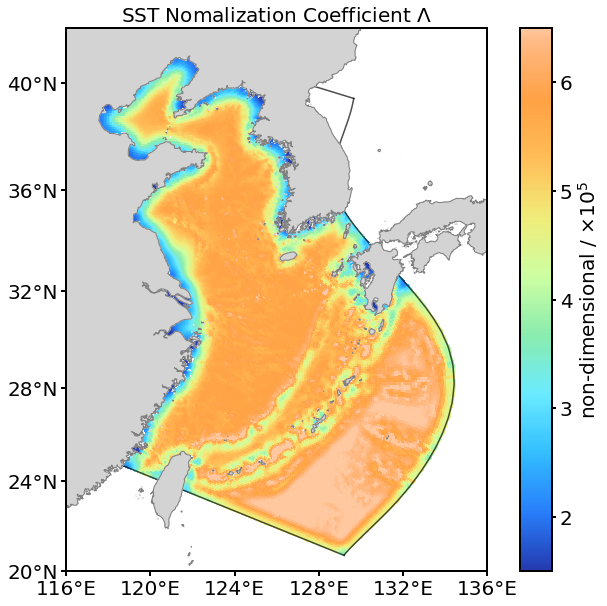

In [11]:
nrmi_sst_ecs = NRMI_ds.temp.isel(s_rho=-1).data
my_haxby_color = cmaps.cmp_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('SST Nomalization Coefficient $\Lambda$ ',fontsize=20)

cp = plt.pcolormesh(rlon2d,rlat2d,nrmi_sst_ecs.squeeze(),vmin = 1.5e5,vmax=6.5e5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('non-dimensional / $\\times 10^{5}$',fontsize = 20) 
# plt.savefig('norm_sst_roms_ecs.pdf',bbox_inches='tight')
plt.savefig('norm_sst_roms_ecs.jpeg',bbox_inches='tight',dpi=1200)

In [32]:
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']


In [23]:
STDI_ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    type: ROMS/TOMS 4DVAR initial conditions error covariance standard deviation
    author: onecountrylee
    history: Created on Sat, July 27, 2024 at 13:28
    title: std from roms_ecsv4.1_scorrection
    dimensions(sizes): xi_rho(242), xi_u(241), xi_v(242), eta_rho(362), eta_u(362), eta_v(361), s_rho(20), ocean_time(362)
    variables(dimensions): float64 ocean_time(ocean_time), float64 zeta(ocean_time, eta_rho, xi_rho), float64 ubar(ocean_time, eta_u, xi_u), float64 vbar(ocean_time, eta_v, xi_v), float64 u(ocean_time, s_rho, eta_u, xi_u), float64 v(ocean_time, s_rho, eta_v, xi_v), float64 temp(ocean_time, s_rho, eta_rho, xi_rho), float64 salt(ocean_time, s_rho, eta_rho, xi_rho), float32 s_rho(s_rho)
    groups: 

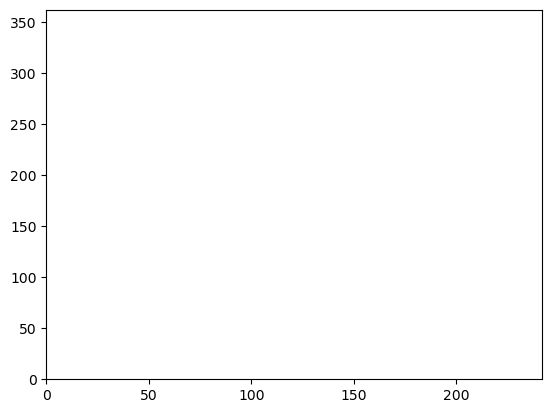

In [29]:
STDI_ds.variables['temp'][0,-1,:,:]

/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Us

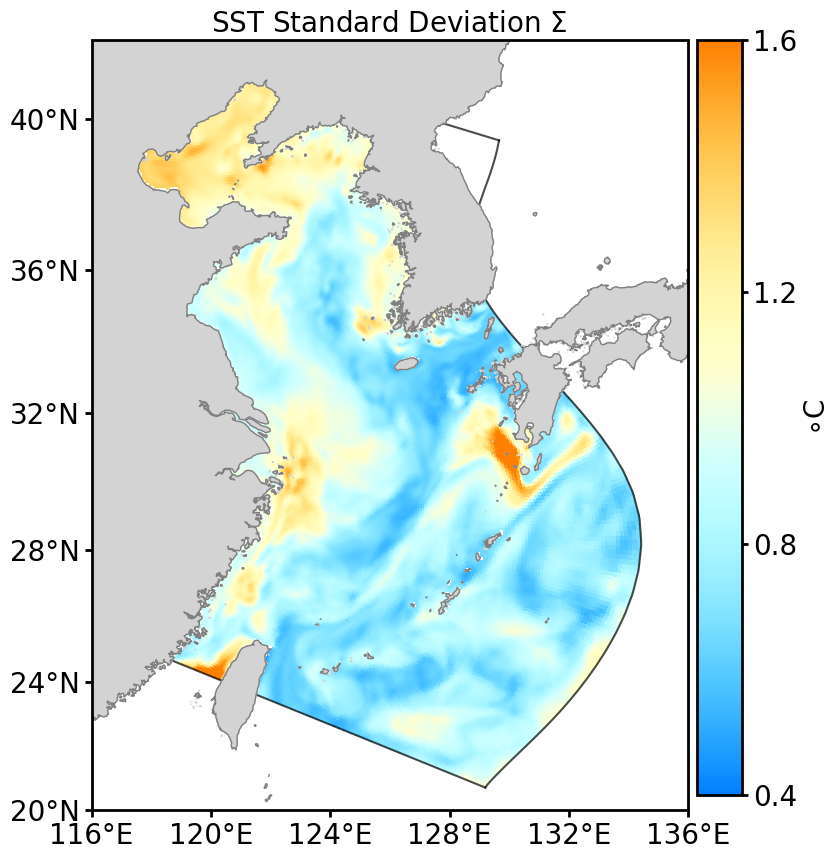

In [14]:
# stdi_sst_ecs = STDI_ds.temp.isel(s_rho=-1).data
stdi_sst_ecs = STDI_ds.variables['temp'][0,-1,:,:]
# my_haxby_color = cmaps.GMT_panoply.colors'===
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
# my_haxby_color = cmaps.cmp_haxby.colors
# my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)

lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('SST Standard Deviation $\Sigma$ ',fontsize=20)
stdi_sst_ecs=stdi_sst_ecs.squeeze()
stdi_sst_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,stdi_sst_ecs,vmin = 0.4,vmax=1.6,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.82, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks=np.arange(0.4,1.8,0.4))
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
# position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('$\circ$C',fontsize = 20) 
# plt.savefig('std_sst_roms_ecs.pdf',bbox_inches='tight')
plt.savefig('std_sst_roms_ecs_v4sc.jpeg',bbox_inches='tight',dpi=400)

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/var/folders/1q/hs896xlj3djcy9rs8_c7zdmc0000gn/T/ipykernel_21237/4102212846.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  position.set_yticklabels([1,2,3,4,5,6])
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


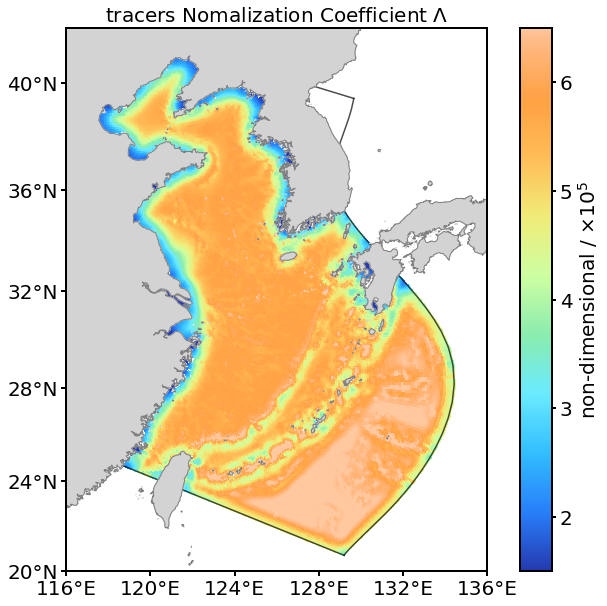

In [34]:
nrmi_sss_ecs = NRMI_ds.salt.isel(s_rho=-1).data
my_haxby_color = cmaps.cmp_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('tracers Nomalization Coefficient $\Lambda$ ',fontsize=20)

cp = plt.pcolormesh(rlon2d,rlat2d,nrmi_sss_ecs.squeeze(),vmin = 1.5e5,vmax=6.5e5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('non-dimensional / $\\times 10^{5}$',fontsize = 20) 
# plt.savefig('norm_tracer_roms_ecs.pdf',bbox_inches='tight')
plt.savefig('norm_tracer_roms_ecs.jpeg',bbox_inches='tight',dpi=1200)

/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Us

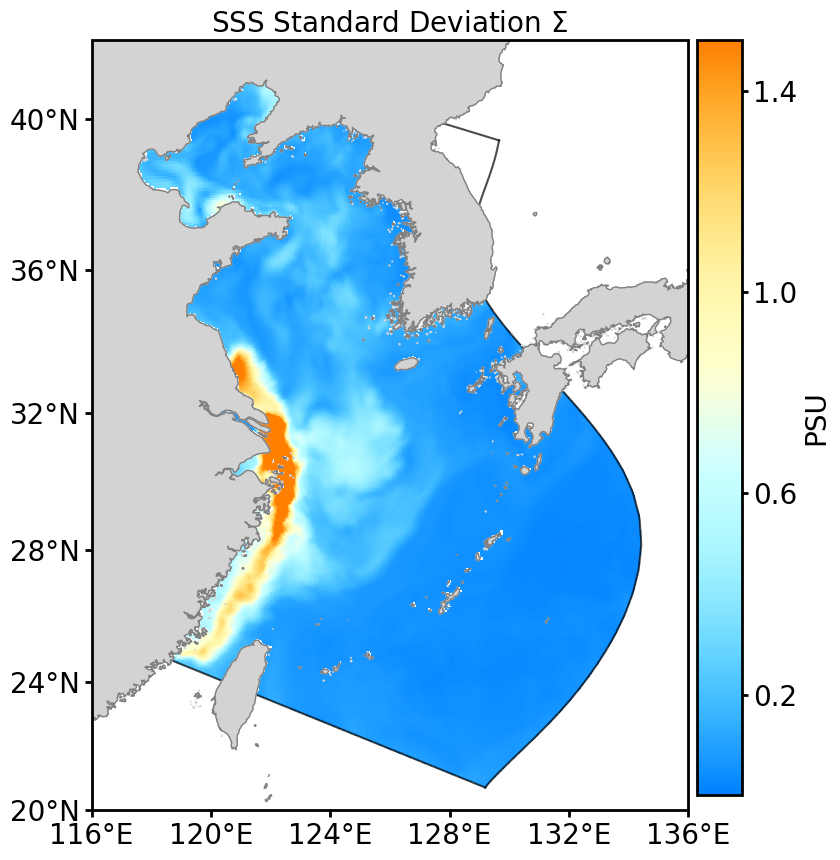

In [15]:
# stdi_sss_ecs = STDI_ds.salt.isel(s_rho=-1).data
stdi_sss_ecs = STDI_ds.variables['salt'][0,-1,:,:]
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
# my_haxby_color = cmaps.cmp_haxby.colors
# my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('SSS Standard Deviation $\Sigma$ ',fontsize=20)
stdi_sss_ecs = stdi_sss_ecs.squeeze()
stdi_sss_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,stdi_sss_ecs.squeeze(),vmin = 0,vmax=1.5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.82, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks=np.arange(0.2,1.6,0.4))
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
# position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('PSU',fontsize = 20) 
# plt.savefig('std_sss_roms_ecs.pdf',bbox_inches='tight')
# plt.savefig('std_sss_roms_ecs.jpeg',bbox_inches='tight',dpi=1200)
plt.savefig('std_sss_roms_ecs_v4sc.jpeg',bbox_inches='tight',dpi=400)

In [ ]:
nrmi_u_ecs = NRMI_ds.u.isel(s_rho=-1).data
my_haxby_color = cmaps.cmp_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('u Nomalization Coefficient $\Lambda$ ',fontsize=20)

cp = plt.pcolormesh(ulon2d,ulat2d,nrmi_u_ecs.squeeze(),vmin = 1.5e5,vmax=6.5e5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(ulon2d[i,:],ulat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(ulon2d[:,i],ulat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('non-dimensional / $\\times 10^{5}$',fontsize = 20) 
plt.savefig('norm_u_roms_ecs.pdf',bbox_inches='tight')


In [ ]:
stdi_u_ecs = STDI_ds.u.isel(s_rho=-1).data
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
# my_haxby_color = cmaps.cmp_haxby.colors
# my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('u Standard Deviation $\Sigma$ ',fontsize=20)
stdi_u_ecs = stdi_u_ecs.squeeze()
stdi_u_ecs[umask_ecs == 0] = np.NaN
cp = plt.pcolormesh(ulon2d,ulat2d,stdi_u_ecs.squeeze(),vmin = 0,vmax=0.5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(ulon2d[i,:],ulat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(ulon2d[:,i],ulat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.82, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
# position.set_yticklabels([1,2,3,4,5,6])
cb.set_label(r'$\mathsf{m\times s^{-1}}$',fontsize = 20) 
plt.savefig('std_u_roms_ecs.pdf',bbox_inches='tight')


In [ ]:
nrmi_v_ecs = NRMI_ds.v.isel(s_rho=-1).data
my_haxby_color = cmaps.cmp_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('v Nomalization Coefficient $\Lambda$ ',fontsize=20)

cp = plt.pcolormesh(vlon2d,vlat2d,nrmi_v_ecs.squeeze(),vmin = 1.5e5,vmax=6.5e5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(vlon2d[i,:],vlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(vlon2d[:,i],vlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])



cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
position.set_yticklabels([1,2,3,4,5,6])
cb.set_label('non-dimensional / $\\times 10^{5}$',fontsize = 20) 
plt.savefig('norm_v_roms_ecs.pdf',bbox_inches='tight')


In [ ]:
stdi_v_ecs = STDI_ds.v.isel(s_rho=-1).data
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
# my_haxby_color = cmaps.cmp_haxby.colors
# my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('v Standard Deviation $\Sigma$ ',fontsize=20)
stdi_v_ecs = stdi_v_ecs.squeeze()
stdi_v_ecs[vmask_ecs == 0] = np.NaN
cp = plt.pcolormesh(vlon2d,vlat2d,stdi_v_ecs.squeeze(),vmin = 0,vmax=0.5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(vlon2d[i,:],vlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(vlon2d[:,i],vlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.82, 0.125,  0.045,0.755,])

cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
# position.set_yticklabels([1,2,3,4,5,6])
cb.set_label(r'$\mathsf{m\times s^{-1}}$',fontsize = 20) 
plt.savefig('std_v_roms_ecs.pdf',bbox_inches='tight')


In [ ]:
nrmi_zeta_ecs = NRMI_ds.zeta.data
my_haxby_color = cmaps.cmp_haxby.colors
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lon_bdy = [116,136];
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('$\zeta$ Nomalization Coefficient $\Lambda$ ',fontsize=20)

cp = plt.pcolormesh(rlon2d,rlat2d,nrmi_zeta_ecs.squeeze(),vmin = 0.2e5,vmax=1.3e5,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.85, 0.125,  0.045,0.755,])



cb = fig.colorbar(cp, cax = position, orientation='vertical')
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
position.set_yticklabels(np.round(np.arange(0.2,1.4,0.2),1))
cb.set_label('non-dimensional / $\\times 10^{5}$',fontsize = 20) 
plt.savefig('norm_zeta_roms_ecs.pdf',bbox_inches='tight')


In [ ]:
stdi_zeta_ecs = STDI_ds.zeta.data
my_haxby_color = sio.loadmat('BuOr.mat')['BuOr']
my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
# my_haxby_color = cmaps.cmp_haxby.colors
# my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color[:][:-5] , N = 256)
lat_bdy = [20,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
ax.set_title('$\zeta$ Standard Deviation $\Sigma$ ',fontsize=20)
stdi_zeta_ecs = stdi_zeta_ecs.squeeze()
stdi_zeta_ecs[mask_ecs == 0] = np.NaN
cp = plt.pcolormesh(rlon2d,rlat2d,stdi_zeta_ecs.squeeze(),vmin =0.1,vmax=0.4,
                    cmap=my_haxby,transform = ccrs.PlateCarree(),zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
for i in [0,-1]:
    plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
position=fig.add_axes([0.82, 0.125,  0.045,0.755,])



cb = fig.colorbar(cp, cax = position, orientation='vertical',ticks=np.round(np.arange(0.1,0.6,0.1),1))
for bnd in position.spines.keys():
        position.spines[bnd].set_linewidth('2')
position.tick_params(direction = 'out',
                     labelrotation=90,length =4, width = 2, labelsize = 20)
# position.set_yticklabels()
cb.set_label('m',fontsize = 20) 
plt.savefig('std_zeta_roms_ecs.pdf',bbox_inches='tight')


In [20]:
# OBS_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/ACSPO_SST/acspo_sst_201701_full.nc')
# OBS_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs//ACSPO_SST/acspo_sst_201701_diurnal.nc')
# OBS_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/NOAA_GHRSST/noaa_ghrsst_201701_full.nc')
# OBS_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace/OBS/ecs_oisst_super_201701_full.nc')
# OBS_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/MUR_SST/jplmur_sst_201701.nc')
# OBS_ds =  xr.open_dataset('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/ACSPO_SST/acspo_sst_diurnal_201205.nc')
OBS_ds =  xr.open_dataset('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/NOAA_GHRSST/geopolar_sst_2012_no25m.nc')
OBS_ds

<xarray.Dataset>
Dimensions:         (survey: 426, state_variable: 7, datum: 16171544)
Dimensions without coordinates: survey, state_variable, datum
Data variables: (12/16)
    spherical       int32 ...
    Nobs            (survey) int32 ...
    survey_time     (survey) float64 ...
    obs_variance    (state_variable) float64 ...
    obs_type        (datum) int32 ...
    obs_provenance  (datum) int32 ...
    ...              ...
    obs_Xgrid       (datum) float64 ...
    obs_Ygrid       (datum) float64 ...
    obs_Zgrid       (datum) float64 ...
    obs_error       (datum) float64 ...
    obs_value       (datum) float64 ...
    obs_meta        (datum) float64 ...
Attributes:
    type:            ROMS Observations
    obs_provenance:  SST_GEOPOLAR:355
    author:          onecountrylee
    history:         Created on Fri, December 13, 2024 at 16:20
    title:           NOAA GEOPOLAR SST Obs

In [21]:
import netCDF4 as nc
obs_time = OBS_ds.obs_time.data
obs_value = OBS_ds.obs_value.data
obs_lon = OBS_ds.obs_lon.data
obs_lat = OBS_ds.obs_lat.data

In [7]:
obs_time = obs_time.astype('float64')/86400*1e-9
obs_time

array([2.07121003e-15, 2.07121003e-15, 2.07121003e-15, ...,
       2.12814268e-15, 2.12814268e-15, 2.12814268e-15])

In [22]:
np.unique(obs_time)

array([15461.5, 15462.5, 15463.5, 15464.5, 15465.5, 15466.5, 15467.5,
       15468.5, 15469.5, 15470.5, 15471.5, 15472.5, 15473.5, 15474.5,
       15475.5, 15476.5, 15477.5, 15478.5, 15479.5, 15480.5, 15481.5,
       15482.5, 15483.5, 15484.5, 15485.5, 15486.5, 15487.5, 15488.5,
       15489.5, 15490.5, 15491.5, 15492.5, 15493.5, 15494.5, 15495.5,
       15496.5, 15497.5, 15498.5, 15499.5, 15500.5, 15501.5, 15502.5,
       15503.5, 15504.5, 15505.5, 15506.5, 15507.5, 15508.5, 15509.5,
       15510.5, 15511.5, 15512.5, 15513.5, 15514.5, 15515.5, 15516.5,
       15517.5, 15518.5, 15519.5, 15520.5, 15521.5, 15522.5, 15523.5,
       15524.5, 15525.5, 15526.5, 15527.5, 15528.5, 15529.5, 15530.5,
       15531.5, 15532.5, 15533.5, 15534.5, 15535.5, 15536.5, 15537.5,
       15538.5, 15539.5, 15540.5, 15541.5, 15542.5, 15543.5, 15544.5,
       15545.5, 15546.5, 15547.5, 15548.5, 15549.5, 15550.5, 15551.5,
       15552.5, 15553.5, 15554.5, 15555.5, 15556.5, 15557.5, 15558.5,
       15559.5, 1556

In [24]:
# %matplotlib
for timei in np.unique(obs_time):
    start_time = timei
    select_time = start_time + 0
    time_inrange = np.where(np.abs(obs_time -select_time) < 1e-10)
    lon_bdy = [116,136];
    lat_bdy = [20,42];
    my_haxby_color = sio.loadmat('LYG_rainbow.mat')['rainbow']
    my_haxby = LinearSegmentedColormap.from_list('lavergne',my_haxby_color, N = 256)
    plt.ion
    plt.rcParams['font.family'] = 'sans-serif'
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('2')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgrey',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out',width =2,length=5, labelsize = 20,top = 0, right = 0)
    # ax.set_title('OISSTv2.1 day='+OBS_ds.obs_time.isel(datum=np.where(obs_time==select_time)[0][0]).data.astype('str')[:10],fontsize=20)
    # ax.set_title('Geo_Polar SST day='+(datetime.datetime(1970,1,1)+datetime.timedelta(select_time)).strftime('%Y-%m-%d %HH'),fontsize=20)
    ax.set_title('GEOPOLAR SST day='+(datetime.datetime(1970,1,1)+datetime.timedelta(select_time)).strftime('%Y-%m-%d %HH'),fontsize=20)

    cp = plt.scatter(obs_lon[time_inrange[0]],
                     obs_lat[time_inrange[0]],10,obs_value[time_inrange[0]],
                     vmin=5,vmax=30,
                     marker='s',cmap=my_haxby,
                     transform=ccrs.PlateCarree(),zorder=-1.9)
    # for i in range(0,rlon2d.shape[0],1):
    #     plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
    # for i in range(0,rlon2d.shape[1],1):
    #     plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
    for i in [0,-1]:
        plt.plot(rlon2d[i,:],rlat2d[i,:],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
    for i in [0,-1]:
        plt.plot(rlon2d[:,i],rlat2d[:,i],color = 'k',transform = ccrs.PlateCarree(),linewidth = 1.5,alpha = 0.7,zorder=-2)
    position=fig.add_axes([0.82, 0.125,  0.045,0.755,])


    cb = fig.colorbar(cp, cax = position, orientation='vertical')
    for bnd in position.spines.keys():
            position.spines[bnd].set_linewidth('2')
    position.tick_params(direction = 'out', length =4, width = 2, labelsize = 20)
    # position.set_yticklabels(np.round(np.arange(0.2,1.4,0.2),1))
    cb.set_label('$\circ$C',fontsize = 20) 
    # plt.show()
    # plt.savefig('oisst_roms_ecs.pdf',bbox_inches='tight')
    plt.savefig('./NOAA_GHRSST/2012/no_25m/geopolar_sst_%s.jpeg'%((datetime.datetime(1970,1,1)+datetime.timedelta(select_time)).strftime('%Y%m%d%H')),bbox_inches='tight',dpi=400)
    # plt.savefig('./NOAA_GHRSST/geopolarsst_2017010612.jpeg',bbox_inches='tight',dpi=1200)
    # plt.savefig('./NOAA_OISST/oisst_2017010312.jpeg',bbox_inches='tight',dpi=1200)
    # plt.savefig('./MUR_SST/jplmur_sst_%s.jpeg'%((datetime.datetime(1970,1,1)+datetime.timedelta(select_time)).strftime('%Y%m%d%HH')),bbox_inches='tight',dpi=1200)
    plt.close()


/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/onecountrylee/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/onecountrylee/opt/anaconda3/li

In [ ]:
obs_time.shape

In [ ]:
obs_time

In [ ]:
OBS_ds.obs_time.isel(datum=)

In [ ]:
np.where(obs_time==select_time)[0][0]

In [ ]:
OBS_ds.obs_time.isel(datum=np.where(obs_time==select_time)[0][0]).data

In [23]:
# from importlib import reload
# reload(dw)
import roms_workspace as dw
my_root = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs'
da_workspaces_info = {  
              # 'workspace':'Adj ALL',
              # 'workspace01':'NUD+Adj ALL',
              'workspace02':'Adj INI',
              'workspace03':'NUD+Adj INI',
              # 'workspace04':'NUD+Adj INI+STF',
               }
var = 'temp'
varname = '%s_sur'%(var)
area    = 'ys'

# dab_Vars = []
# dab_Workspaces = []

# for iwork, (workname, detail) in enumerate(da_workspaces_info.items()):
#     print(iwork, workname, detail)
#     dab_Workspaces.append(dw.Da_workspace(MY_ROOT=my_root,workspace_name=workname,workspace_detail=detail))
#     dab_Workspaces[iwork].load_mtfroms(isAna=False,Surf=True)
#     dab_Vars.append(dab_Workspaces[iwork].pull_var2d(varname=varname,area=area,time_range=('2017-01-03','2017-02-02')))

daa_Vars = []
daa_Workspaces = []
for iwork, (workname, detail) in enumerate(da_workspaces_info.items()):
    print(iwork, workname, detail)
    daa_Workspaces.append(dw.Da_workspace(MY_ROOT=my_root,workspace_name=workname,workspace_detail=detail))
    daa_Workspaces[iwork].load_mtfroms(isAna=True,Surf=True)
    daa_Vars.append(daa_Workspaces[iwork].pull_var2d(varname=varname,area=area,time_range=('2017-01-03','2017-02-02')))


0 workspace02 Adj INI
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace02


AttributeError: 'dict' object has no attribute 'append'

In [30]:
# from importlib import reload
# reload(rw)
import roms_workspace as rw
import scipy as sci
import os
##========================================================================##
#  Stick to the guideline of beginning with the simplest approach,
#  only sea surface temperature (SST) was assimilated, and only
#  initial condition was adjusted.
#  Here we first validated the performance of ROMS I4D-VAR configured
#  in this strategy.
##========================================================================##
my_rootnl = '/Volumes/Elements SE/roms4dvar_ecs'
my_rootda = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs'
nl_workspace_info = {
                     # 'run04/outputs':'FORWARD',
                     'run17_1hr/outputs':'FORWARD',
                     }
da_workspace_info = {
                     # 'workspace':'Adj ALL',
                     # 'workspace03':'NUD+Adj INI',
                     'workspace02':'Adj INI',
                     
                     }

var = 'temp'
areas = {
         'bh': ('Bohai Sea', [0,7]),
        'ys': ('Yellow Sea', [6.5,11]),
        'cre': ('Changjiang River Estuary',[10.5,14.5]),
        'ks': ('Kuroshio Current System', [21.5,24]),
        'all': ('East China Sea', [10,25])
}

nl_Vars = {}
nl_Workspaces = []
for i in range(len(nl_workspace_info)):
    nl_Workspaces.append(rw.Nl_workspace( MY_ROOT         =my_rootnl,
                                    workspace_name  =list(nl_workspace_info.keys())[i],
                                    workspace_detail=list(nl_workspace_info.values())[i]
                                   ))
    nl_Workspaces[i].load_mtfroms(isAna=False,Surf=True)


dab_Vars = {}
dab_Workspaces = []
for i in range(len(da_workspace_info)):
    dab_Workspaces.append(rw.Da_workspace(MY_ROOT         =my_rootda, 
                                    workspace_name  = list(da_workspace_info.keys())[i],
                                    workspace_detail= list(da_workspace_info.values())[i]
                                   ))
    dab_Workspaces[i].load_mtfroms(isAna=False, Surf=True)

daa_Vars = {}
daa_Workspaces = []
for i in range(len(da_workspace_info)):
    daa_Workspaces.append(rw.Da_workspace(MY_ROOT         =my_rootda, 
                                    workspace_name  = list(da_workspace_info.keys())[i],
                                    workspace_detail= list(da_workspace_info.values())[i]
                                   ))
    daa_Workspaces[i].load_mtfroms(isAna=True, Surf=True)

obs_ds = xr.open_dataset(os.path.join(my_rootda,
                                      list(da_workspace_info.keys())[0],
                                      'OBS',
                                      'ecs_oisst_super_201701_full.nc'
                                      ))
obs_time = obs_ds.obs_time.data.astype('float')/86400/1e9
obs_value = obs_ds.obs_value.data
obs_lon = obs_ds.obs_lon.data
obs_lat = obs_ds.obs_lat.data
obs_Vars = {} 
area_index={}
obs_inarea ={}
# area iteration 
for iw in range(len((nl_workspace_info))):
    for area in list(areas.keys()):
        print('loading %s in %s  area...'%(var,area))
        if iw == 0:
            nl_Vars[area] = []
        # loading data from FORWARD model outputs
        nl_Vars[area].append(nl_Workspaces[iw].pull_var2d(varname=         var, area=area,time_range=('2017-01-03','2017-02-02')))
for iw in range(len((da_workspace_info))):
    for area in list(areas.keys()):
        print('loading %s in %s  area...'%(var,area))
        if iw == 0:
            
            dab_Vars[area] = []
            daa_Vars[area] = []
        
        
        # loading data from prior outputs

        # dab_Vars[area].append(dab_Workspaces[iw].pull_var2d(varname='%s_sur'%var, area=area,time_range=('2017-01-03','2017-02-02')))
        # loading data from posterior outputs
        daa_Vars[area].append(daa_Workspaces[iw].pull_var2d(varname='%s_sur'%var, area=area,time_range=('2017-01-03','2017-02-02')))

        #================================extrapolate observation data to model grid================================
        index_insea = np.where(~np.isnan(daa_Vars[area][0].value[0,:,:]))
        obs_Vars[area] = np.zeros(
                                [len(obs_ds.survey_time.data), 
                                 len(index_insea[0])]
                                ) 
        for itime, itime_obs in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
            index_thistime = np.where(obs_time == itime_obs)[0]
            obs_Vars[area][itime,:] = sci.interpolate.griddata(
                                                               np.c_[obs_lon[index_thistime],
                                                                    obs_lat[index_thistime]],
                                                               obs_value[index_thistime],
                                                               np.c_[daa_Vars[area][0].lon[index_insea],
                                                                     daa_Vars[area][0].lat[index_insea]],
                                                               method ='nearest')
        #==========================================================================================================
        # note that it's more resonable to interp model data to observation location 
        # since model grider is finer than observaion resolution
        #==========================================================================================================


Workspace: /Volumes/Elements SE/roms4dvar_ecs/run17_1hr/outputs
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace02
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace02
loading temp in bh  area...
loading temp in ys  area...
loading temp in cre  area...
loading temp in ks  area...
loading temp in all  area...
loading temp in bh  area...
loading temp in ys  area...
loading temp in cre  area...
loading temp in ks  area...
loading temp in all  area...


In [ ]:
da_workspaces_info = {  
              # 'workspace':'Adj ALL',
              # 'workspace01':'NUD+Adj ALL',
              'workspace02':'Adj INI',
              'workspace03':'NUD+Adj INI',
              # 'workspace04':'NUD+Adj INI+STF',
               }
list(da_workspaces_info.values())[0]

In [ ]:
my_root = '/Volumes/Elements SE/roms4dvar_ecs/'
nl_workspaces_info = {'run04/outputs':'LOG DRAG',
                      'run17/outputs':'QUAD DRAG'
                     }
nl_Vars =[]
nl_Workspaces = []
varname=var
for iwork, (workname, detail) in enumerate(nl_workspaces_info.items()):
    print(iwork, workname, detail)
    nl_Workspaces.append(dw.Nl_workspace(MY_ROOT=my_root,workspace_name=workname,workspace_detail=detail))
    nl_Workspaces[iwork].load_mtfroms(isAna=False,Surf=True)
    nl_Vars.append(nl_Workspaces[iwork].pull_var2d(varname=varname,area=area,time_range=('2017-01-03','2017-02-02')))

In [ ]:
colorarray = cmaps.cmocean_algae.colors[:][50:]
dab_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray = cmaps.cmocean_amp.colors[:][50:]
daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
nl_color = ['k', 'grey']
for iwork,work in enumerate(dab_Workspaces):
    work.color = dab_color[iwork]
for iwork,work in enumerate(daa_Workspaces):
    work.color = daa_color[iwork]
for iwork,work in enumerate(nl_Workspaces):
    work.color = nl_color[iwork]
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ivar =0
for ivar, var in enumerate(dab_Vars):
    time_range = var.time_range
    ax.plot(dab_Vars[ivar].ocean_time[2::4],np.nanmean(dab_Vars[ivar].value[2::4],axis=(1,2)),
            label = 'BG ' + dab_Workspaces[ivar].workspace_detail,
            color = dab_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=0.8,zorder = 0)

for ivar, var in enumerate(nl_Vars):
    time_range = var.time_range
    ax.plot(nl_Vars[ivar].ocean_time.data,np.nanmean(nl_Vars[ivar].value,axis=(1,2)),
            label = nl_Workspaces[ivar].workspace_detail,
            color = nl_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=1,zorder = 1)
for ivar, var in enumerate(daa_Vars):
    time_range = var.time_range
    ax.plot(daa_Vars[ivar].ocean_time[2::4],np.nanmean(daa_Vars[ivar].value[2::4],axis=(1,2)),
            label = 'ANA ' + daa_Workspaces[ivar].workspace_detail,
            color = daa_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=0.8,zorder = 0)

ax.legend(ncol=2)
# ax.set_ylim([-.5,.5])
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 15,top = 0, right = 0)
if nl_Vars[1].area == 'ys': area_fullname = 'yellow_sea'
if nl_Vars[1].area == 'cre': area_fullname = 'changjiang_river_estaury'
ax.set_title(area_fullname+':'+nl_Vars[1].name,fontsize=20)
# plt.savefig('./u_%s_contrast.png'%(nl_Vars[1].area),dpi=600)

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot()
ax.plot(daa_Vars[0].ocean_time[2::4],
        np.nanmean(daa_Vars[0].value[2::4],axis=(1,2))-np.nanmean(nl_Vars[1].value,axis=(1,2)),
            label = 'ANA ' + daa_Workspaces[ivar].workspace_detail,
            color = daa_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=0.5,zorder = 0)

ax.plot(daa_Vars[0].ocean_time[2::4],
        np.nanmean(daa_Vars[0].value[2::4],axis=(1,2)),
            label = 'ANA ' + daa_Workspaces[ivar].workspace_detail,
            color = daa_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=1,zorder = 0)

ax.plot(daa_Vars[0].ocean_time[2::4],
        np.nanmean(daa_Vars[0].value[2::4],axis=(1,2)),
            label = 'ANA ' + daa_Workspaces[ivar].workspace_detail,
            color = daa_Workspaces[ivar].color,
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=0.5,zorder = 0)
ax.plot(daa_Vars[0].ocean_time[2::4],
        np.nanmean(nl_Vars[1].value,axis=(1,2)),
            label = 'ANA ' + daa_Workspaces[ivar].workspace_detail,
            color = 'k',
            # marker='.',
            linestyle='-',
            linewidth=2.5,alpha=0.5,zorder = 0)



In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(projection = ccrs.Mercator())
c = ax.pcolormesh(daa_Vars[3].lon, daa_Vars[0].lat, daa_Vars[0].value[10,:,:].squeeze(),transform = ccrs.PlateCarree())
plt.colorbar(c)
ax.set_title(daa_Vars[0].ocean_time[10].data)

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(projection = ccrs.Mercator())

c = ax.pcolormesh(daa_Vars[0].lon, daa_Vars[0].lat, nl_Vars[1].value[2,:,:].squeeze(),transform = ccrs.PlateCarree())
plt.colorbar(c)
ax.set_title(nl_Vars[0].ocean_time[2].data)

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(projection = ccrs.Mercator())
c = ax.pcolormesh(daa_Vars[0].lon, daa_Vars[0].lat, 
                  daa_Vars[0].value[10,:,:]- nl_Vars[1].value[2,:,:].squeeze(),
                  vmin = -1, vmax = 1, cmap = 'jet',
                  transform = ccrs.PlateCarree())
plt.colorbar(c)
ax.set_title(nl_Vars[0].ocean_time[2].data)

In [ ]:
daa_Workspaces[0].ana_ds

In [ ]:
np.arange(2, 721,4)

In [ ]:
nl_Vars[0].time_range

In [ ]:
daa_Vars[0].value[2::4].shape

In [ ]:
nl_Vars[0].value.shape

In [ ]:
plt.plot(dab_Workspaces[0].bg_ds.ocean_time.data,np.nanmean(dab_Vars[0].value,axis=(1,2)))
plt.plot(nl_Workspaces[0].bg_ds.ocean_time.sel(ocean_time=time_range).data,np.nanmean(nl_Vars[0].value,axis=(1,2)))


In [273]:
nl_Vars['all'][0].ocean_time[12]

<xarray.DataArray 'ocean_time' ()>
array('2017-01-03T12:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    s_rho       float64 -0.025
    ocean_time  datetime64[ns] 2017-01-03T12:30:00
Attributes:
    long_name:  averaged time since initialization
    field:      time, scalar, series

In [456]:
# from importlib import reload
# reload(rw)
import roms_workspace as rw
import scipy as sci
import os
##========================================================================##
#  Stick to the guideline of beginning with the simplest approach,
#  only sea surface temperature (SST) was assimilated, and only
#  initial condition was adjusted.
#  Here we first validated the performance of ROMS I4D-VAR configured
#  in this strategy.
##========================================================================##
my_rootnl = '/Volumes/Elements SE/roms4dvar_ecs'
my_rootda = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs'
nl_workspace_info = {
                     # 'run04/outputs':'FORWARD',
                     'run17_1hr/outputs':'FORWARD',
                     }
da_workspace_info = {
                     'workspace':'Adj ALL',
                     # 'workspace03':'NUD+Adj INI',
                     'workspace02':'Adj INI',
                     
                     }

var = 'salt'
areas = {
         'bh': ('Bohai Sea', [0,7]),
        'ys': ('Yellow Sea', [6.5,11]),
        'cre': ('Changjiang River Estuary',[10.5,14.5]),
        'ks': ('Kuroshio Current System', [21.5,24]),
        'all': ('East China Sea', [10,25])
}

nl_Vars = {}
nl_Workspaces = []
for i in range(len(nl_workspace_info)):
    nl_Workspaces.append(rw.Nl_workspace( MY_ROOT         =my_rootnl,
                                    workspace_name  =list(nl_workspace_info.keys())[i],
                                    workspace_detail=list(nl_workspace_info.values())[i]
                                   ))
    nl_Workspaces[i].load_mtfroms(isAna=False,Surf=True)


dab_Vars = {}
dab_Workspaces = []
for i in range(len(da_workspace_info)):
    dab_Workspaces.append(rw.Da_workspace(MY_ROOT         =my_rootda, 
                                    workspace_name  = list(da_workspace_info.keys())[i],
                                    workspace_detail= list(da_workspace_info.values())[i]
                                   ))
    dab_Workspaces[i].load_mtfroms(isAna=False, Surf=True)

daa_Vars = {}
daa_Workspaces = []
for i in range(len(da_workspace_info)):
    daa_Workspaces.append(rw.Da_workspace(MY_ROOT         =my_rootda, 
                                    workspace_name  = list(da_workspace_info.keys())[i],
                                    workspace_detail= list(da_workspace_info.values())[i]
                                   ))
    daa_Workspaces[i].load_mtfroms(isAna=True, Surf=True)

obs_ds = xr.open_dataset(os.path.join(my_rootda,
                                      list(da_workspace_info.keys())[0],
                                      'OBS',
                                      'ecs_oisst_super_201701_full.nc'
                                      ))
obs_time = obs_ds.obs_time.data.astype('float')/86400/1e9
obs_value = obs_ds.obs_value.data
obs_lon = obs_ds.obs_lon.data
obs_lat = obs_ds.obs_lat.data
obs_Vars = {} 
area_index={}
obs_inarea ={}
# area iteration 
for iw in range(len((nl_workspace_info))):
    for area in list(areas.keys()):
        print('loading %s in %s  area...'%(var,area))
        if iw == 0:
            nl_Vars[area] = []
        # loading data from FORWARD model outputs
        nl_Vars[area].append(nl_Workspaces[iw].pull_var2d(varname=         var, area=area,time_range=('2017-01-03','2017-02-02')))
for iw in range(len((da_workspace_info))):
    for area in list(areas.keys()):
        print('loading %s in %s  area...'%(var,area))
        if iw == 0:
            
            dab_Vars[area] = []
            daa_Vars[area] = []
        
        
        # loading data from prior outputs

        dab_Vars[area].append(dab_Workspaces[iw].pull_var2d(varname='%s_sur'%var, area=area,time_range=('2017-01-03','2017-02-02')))
        # loading data from posterior outputs
        daa_Vars[area].append(daa_Workspaces[iw].pull_var2d(varname='%s_sur'%var, area=area,time_range=('2017-01-03','2017-02-02')))

        #================================extrapolate observation data to model grid================================
        index_insea = np.where(~np.isnan(daa_Vars[area][0].value[0,:,:]))
        obs_Vars[area] = np.zeros(
                                [len(obs_ds.survey_time.data), 
                                 len(index_insea[0])]
                                ) 
        for itime, itime_obs in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
            index_thistime = np.where(obs_time == itime_obs)[0]
            obs_Vars[area][itime,:] = sci.interpolate.griddata(
                                                               np.c_[obs_lon[index_thistime],
                                                                    obs_lat[index_thistime]],
                                                               obs_value[index_thistime],
                                                               np.c_[daa_Vars[area][0].lon[index_insea],
                                                                     daa_Vars[area][0].lat[index_insea]],
                                                               method ='nearest')
        #==========================================================================================================
        # note that it's more resonable to interp model data to observation location 
        # since model grider is finer than observaion resolution
        #==========================================================================================================


Workspace: /Volumes/Elements SE/roms4dvar_ecs/run17_1hr/outputs
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace02
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace
Workspace: /Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace02
loading salt in bh  area...
loading salt in ys  area...
loading salt in cre  area...
loading salt in ks  area...
loading salt in all  area...
loading salt in bh  area...
loading salt in ys  area...
loading salt in cre  area...
loading salt in ks  area...
loading salt in all  area...
loading salt in bh  area...
loading salt in ys  area...
loading salt in cre  area...
loading salt in ks  area...
loading salt in all  area...


In [458]:
#================================calculate area-mean sst at observation location================================
# FORWARD model
obs_location = np.c_[
                     obs_lon[np.where(obs_time == 17169.5)[0]],
                     obs_lat[np.where(obs_time == 17169.5)[0]]
                    ]


for iw in range(len((nl_workspace_info))):
    for area in list(areas.keys()):
        nl_Vars[area][iw].val_obsgrd   = np.zeros([len( nl_Vars[area][iw].ocean_time), len(obs_location)])
        for i in range(1):
        
            nl_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[nl_Vars[area][iw].lon.ravel(),
                                                                            nl_Vars[area][iw].lat.ravel()],
                                                                      nl_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                 )
for iw in range(len((da_workspace_info))):
    for area in list(areas.keys()):



        dab_Vars[area][iw].val_obsgrd  = np.zeros([len(dab_Vars[area][iw].ocean_time), len(obs_location)])

        daa_Vars[area][iw].val_obsgrd  = np.zeros([len(daa_Vars[area][iw].ocean_time), len(obs_location)])



        for i in  range(1):
            dab_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[dab_Vars[area][iw].lon.ravel(),
                                                                            dab_Vars[area][iw].lat.ravel()],
                                                                      dab_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                      )

        for i in  range(1):
            daa_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[daa_Vars[area][iw].lon.ravel(),
                                                                            daa_Vars[area][iw].lat.ravel()],
                                                                      daa_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                      )
for area in list(areas.keys()):
    area_index[area] = np.where(~np.isnan(daa_Vars[area][0].val_obsgrd[0,:]))
   
    obs_inarea[area] = np.zeros([30,len(area_index[area][0])])*np.NAN
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]x
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[area][0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]

    
for iw in range(len((nl_workspace_info))):
    for area in list(areas.keys()):
        nl_Vars[area][iw].val_obsgrd   = np.zeros([len( nl_Vars[area][iw].ocean_time), len(obs_location)])
        for i, itime_nl in enumerate(nl_Vars[area][iw].ocean_time):
        
            nl_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[nl_Vars[area][iw].lon.ravel(),
                                                                            nl_Vars[area][iw].lat.ravel()],
                                                                      nl_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                     method ='nearest')
for iw in range(len((da_workspace_info))):
    for area in list(areas.keys()):



        dab_Vars[area][iw].val_obsgrd  = np.zeros([len(dab_Vars[area][iw].ocean_time), len(obs_location)])

        daa_Vars[area][iw].val_obsgrd  = np.zeros([len(daa_Vars[area][iw].ocean_time), len(obs_location)])



        for i, itime_daa in enumerate(dab_Vars[area][iw].ocean_time):
            dab_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[dab_Vars[area][iw].lon.ravel(),
                                                                            dab_Vars[area][iw].lat.ravel()],
                                                                      dab_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                      method ='nearest')

        for i, itime_daa in enumerate(daa_Vars[area][iw].ocean_time):
            daa_Vars[area][iw].val_obsgrd[i,:] =  sci.interpolate.griddata(np.c_[daa_Vars[area][iw].lon.ravel(),
                                                                            daa_Vars[area][iw].lat.ravel()],
                                                                      daa_Vars[area][iw].value[i,:,:].ravel(),
                                                                      obs_location,
                                                                      method ='nearest')


In [ ]:
for area in list(areas.keys()):
    area_index[area] = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
   
    obs_inarea[area] = np.zeros([30,len(area_index[area][0])])
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[area][0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]


In [ ]:
onobstime_ddaa[area].shape

In [459]:
areas = {
         'bh': ('Bohai Sea', [-0.5,7.5]),
        'ys': ('Yellow Sea', [6.5,11]),
        'cre': ('Changjiang River Estuary',[12,16.5]),
        'ks': ('Kuroshio Current System', [22.,24.5]),
        'all': ('East China Sea', [10,25])
}
timemean_obs = {}
timemean_dab = {}
timemean_daa = {}
timemean_nl = {}

timemean_ddab = {}
timemean_ddaa = {}
timemean_dnl = {}

onobstime_dab = {}
onobstime_daa = {}
onobstime_nl = {}

onobstime_ddab = {}
onobstime_ddaa = {}
onobstime_dnl = {}

    
    
for area in list(areas.keys()):
    timemean_nl[area] = []
    timemean_dnl[area] = []
    onobstime_nl[area] = []
    onobstime_dnl[area] = []
    for iw in range(len((nl_workspace_info))):
        for it in range(len(obs_ds.survey_time.data)):
            if it == 0:
                timemean_nl[area].append(0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]]))
                timemean_dnl[area].append(0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]]) - \
                                  obs_inarea[area][it][:])
                
                onobstime_nl[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))
                onobstime_dnl[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))
            else:
                timemean_nl[area][iw]   += 0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]])
                timemean_dnl[area][iw] += 0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]]) -  \
                                  obs_inarea[area][it][:]
            
            onobstime_nl[area][iw][it,:] =  0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]])
            onobstime_dnl[area][iw][it,:] = 0.5*(nl_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] + \
                                     nl_Vars[area][iw].val_obsgrd[12+24*it,area_index[area]]) -  \
                                  obs_inarea[area][it][:]
            
        timemean_nl[area][iw]  = timemean_nl[area][iw]/len(obs_ds.survey_time.data)
        timemean_dnl[area][iw] = timemean_dnl[area][iw] /len(obs_ds.survey_time.data)
        
    
    
    
    
for area in list(areas.keys()):
        
    timemean_dab[area] = []
    timemean_daa[area] = []

    timemean_ddab[area] = []
    timemean_ddaa[area] = []

    onobstime_dab[area] = []
    onobstime_daa[area] = []

    onobstime_ddab[area] = []
    onobstime_ddaa[area] = []
    for iw in range(len((da_workspace_info))):   
        for it in range(len(obs_ds.survey_time.data)):
            if it == 0:
                timemean_obs[area] = obs_inarea[area][it][:].copy()
                timemean_dab[area].append(dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy())
                timemean_daa[area].append(daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy())


                timemean_ddab[area].append(dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:])
                timemean_ddaa[area].append(daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:])


                onobstime_dab[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))
                onobstime_daa[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))


                onobstime_ddab[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))
                onobstime_ddaa[area].append(np.zeros((len(obs_ds.survey_time.data),len(obs_inarea[area][0][:]))))



            else:
                timemean_obs[area]  += obs_inarea[area][it][:].copy()
                timemean_dab[area][iw]  += dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy()
                timemean_daa[area][iw]  += daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy()


                timemean_ddab[area][iw] += dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:]
                timemean_ddaa[area][iw] += daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:]


            onobstime_dab[area][iw][it,:] = dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy()
            onobstime_daa[area][iw][it,:] =daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]].copy()


            onobstime_ddab[area][iw][it,:] = dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:]
            onobstime_ddaa[area][iw][it,:] = daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]] - \
                                      obs_inarea[area][it][:]



        timemean_obs[area] = timemean_obs[area]/len(obs_ds.survey_time.data)
        timemean_dab[area][iw] = timemean_dab[area][iw]/len(obs_ds.survey_time.data)
        timemean_daa[area][iw] = timemean_daa[area][iw]/len(obs_ds.survey_time.data)

        
        timemean_ddab[area][iw] = timemean_ddab[area][iw]/len(obs_ds.survey_time.data)
        timemean_ddaa[area][iw] = timemean_ddaa[area][iw]/len(obs_ds.survey_time.data)
        


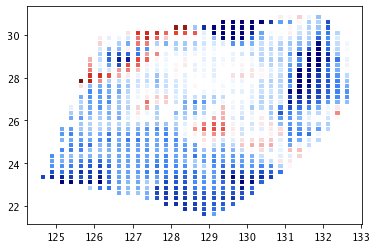

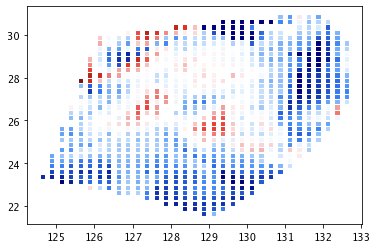

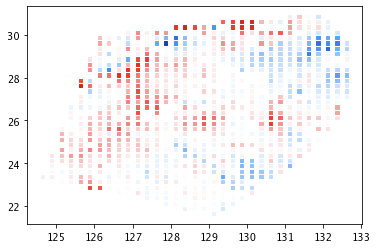

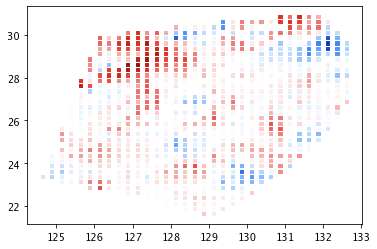

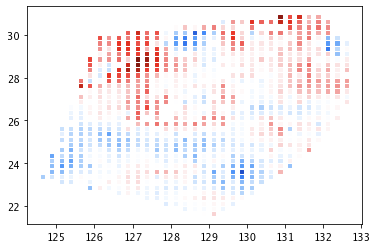

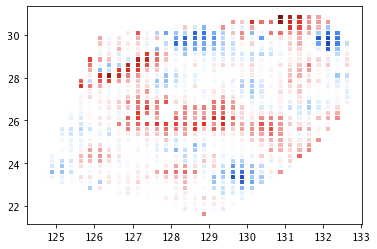

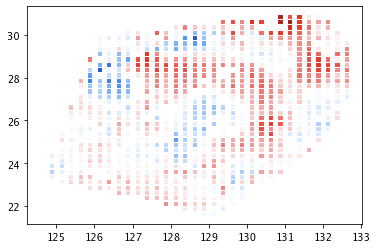

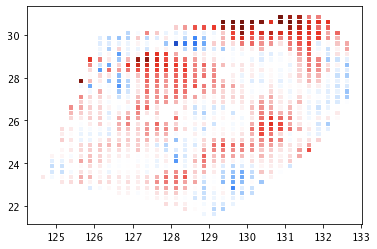

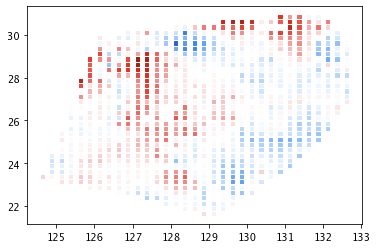

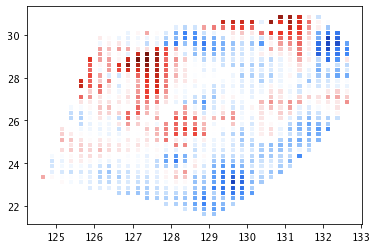

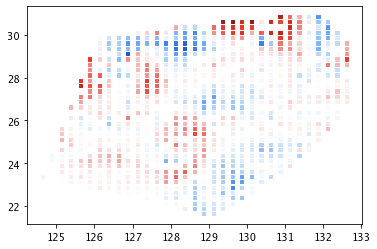

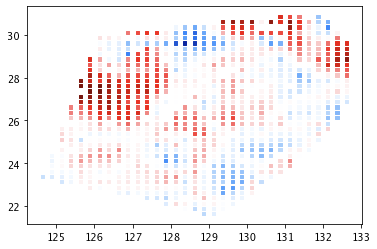

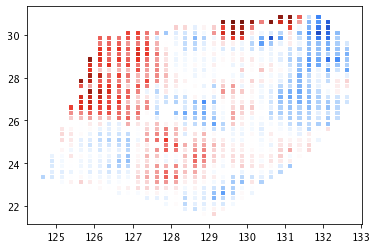

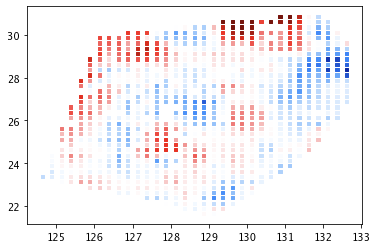

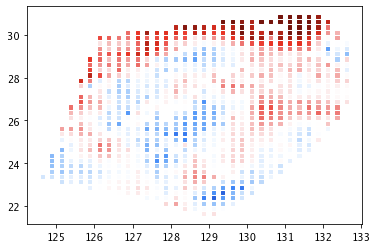

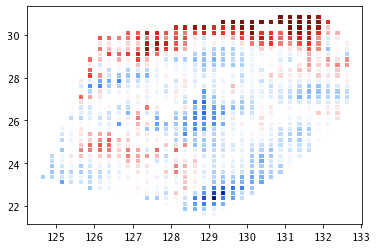

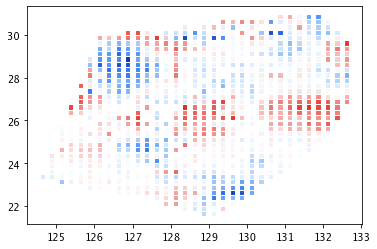

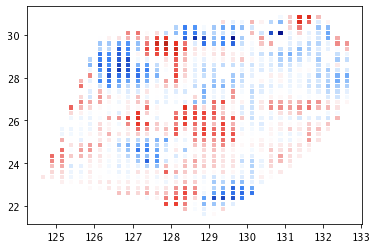

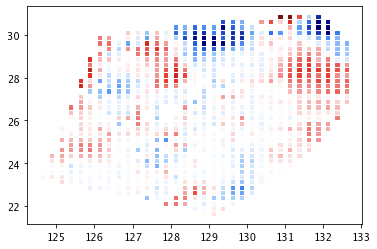

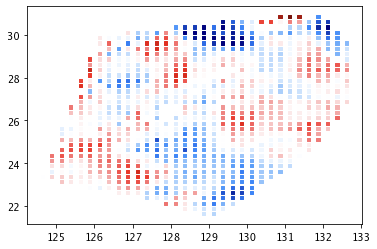

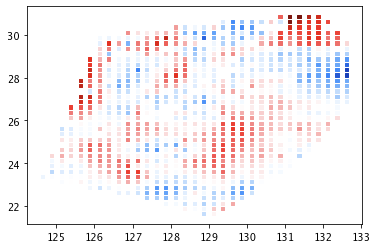

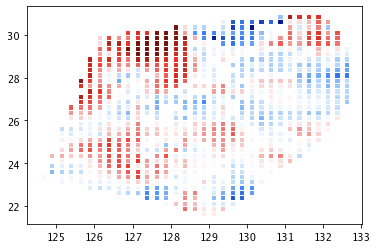

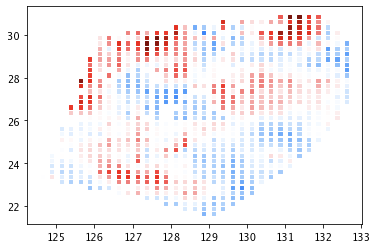

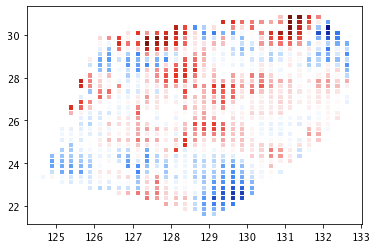

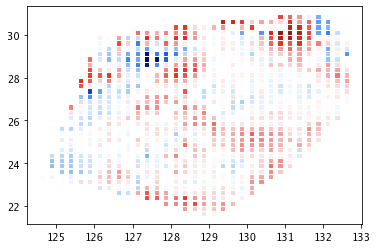

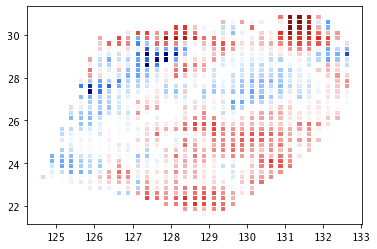

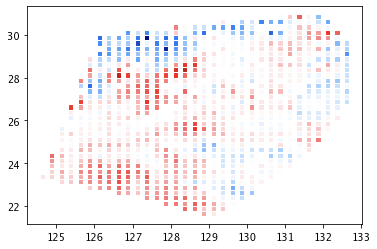

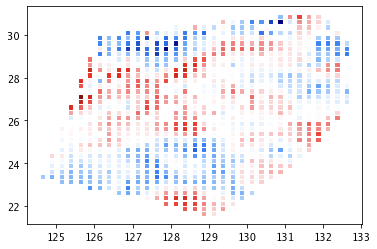

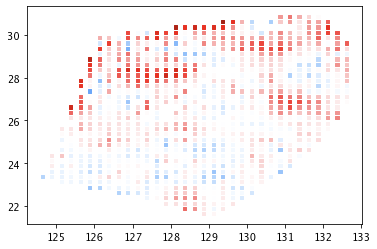

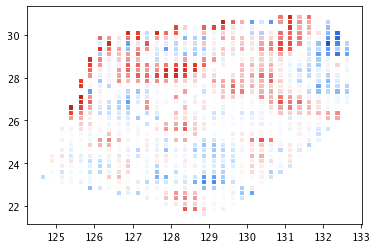

In [347]:

for i in range(30):
    plt.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,,marker='s',vmin=-2,vmax=2,cmap=my_div)
    plt.show()

In [ ]:
areas = {
         'bh': ('Bohai Sea', [-0.5,7.5]),
        'ys': ('Yellow Sea', [6.5,11]),
        'cre': ('Changjiang River Estuary',[11,15]),
        'ks': ('Kuroshio Current System', [21.8,24.2])
}
#====================================Calculate on model grid
plt.rcParams['font.family'] = 'Lucida Grande'
# colorarray = cmaps.GMT_haxby.colors[:][:-8]
# nl_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,4)).astype(int)]
# colorarray = cmaps.cmocean_algae.colors[:][50:]
# daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray =   np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                ])/255
colorarray_blue = np.zeros([256,3])
for i in range(3):
    colorarray_blue[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
nl_color= [colorarray_blue[i,:] for i in np.ceil(np.linspace(0,len(colorarray_blue)-30,4)).astype(int)]

colorarray =   np.array(  [
                 [117,20,12],
                [140,26,17],
                [164,33,21],
                [188,39,26],
                [212,45,31],
                [233,52,37],
                [235,76,67],
                [233,52,37],
                [235,76,67],
                [237,117,113],
                [242,164,162]
                ])/255
colorarray_red = np.zeros([256,3])
for i in range(3):
    colorarray_red[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
daa_color= [colorarray_red[i,:] for i in np.ceil(np.linspace(0,len(colorarray_red)-50,4)).astype(int)]
fig = plt.figure(figsize=(13,6), constrained_layout = True)

for i, (area, areainfo) in enumerate(areas.items()):
    ax = fig.add_subplot(2,2,i+1)

    for bnd in ax.spines.keys():
                            ax.spines[bnd].set_linewidth('1.5')
    
    ax.plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(obs_Vars[area],axis=1),linewidth = 2.5,color = 'k',marker= '.')
    ax.plot(daa_Vars[area].ocean_time,np.nanmean(daa_Vars[area].value,axis=(1,2)),linewidth = 2, color = daa_color[2], label = 'Post '+ daa_Workspace.workspace_detail)
    ax.plot(nl_Vars[area].ocean_time,np.nanmean(nl_Vars[area].value,axis=(1,2)),linewidth = 2,color = nl_color[2],label = nl_Workspace.workspace_detail)

    ax.set_xticks(daa_Vars[area].ocean_time[0::240].astype('float')/86400/1e9)
    # ax.tick_params('x',labelbottom=False)
    ax.tick_params(direction = 'in', length = 3, width = 1.5, labelsize = 12)
    # ax.set_ylim([0,8])
    if i+1 ==1 :ax.legend(fontsize=12)
    if i+1 == 1 or i+1 == 2:
        ax.tick_params('x',labelbottom=False)
    
    ax.tick_params('x',pad=10)
    
    ax.set_title('%s' %areainfo[0],fontsize =16)
    ax.set_ylim(areainfo[1])
    if i +1 ==3 or i+1 ==1: ax.set_ylabel('temp/$\degree$C',fontsize = 12)
# plt.savefig('roms_i4dvar_valid_modgrd_adj_ini.pdf')

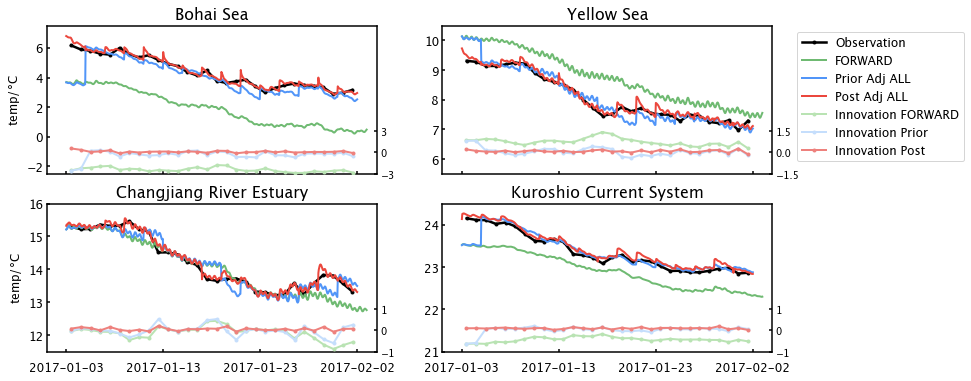

In [329]:
areas = {
         'bh': ('Bohai Sea', [-2.5,7.5]),
        'ys': ('Yellow Sea', [5.5,10.5]),
        'cre': ('Changjiang River Estuary',[11.5,16]),
        'ks': ('Kuroshio Current System', [21,24.5])
}
#====================================Calculate on observation grid
plt.rcParams['font.family'] = 'Lucida Grande'
# colorarray = cmaps.GMT_haxby.colors[:][:-8]
# nl_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,4)).astype(int)]
# colorarray = cmaps.cmocean_algae.colors[:][50:]
# daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray =   np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                ])/255
colorarray_blue = np.zeros([256,3])
for i in range(3):
    colorarray_blue[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
dab_color= [colorarray_blue[i,:] for i in np.ceil(np.linspace(0,len(colorarray_blue)-20,4)).astype(int)]

colorarray =   np.array(  [
                 [117,20,12],
                [140,26,17],
                [164,33,21],
                [188,39,26],
                [212,45,31],
                [233,52,37],
                [235,76,67],
                [233,52,37],
                [235,76,67],
                [237,117,113],
                [242,164,162]
                ])/255
colorarray_red = np.zeros([256,3])
for i in range(3):
    colorarray_red[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
daa_color= [colorarray_red[i,:] for i in np.ceil(np.linspace(0,len(colorarray_red)-20,4)).astype(int)]


colorarray_oran = cmaps.MPL_PRGn_r.colors[:63][:]
nl_color= [colorarray_oran[i][:] for i in np.ceil(np.linspace(0,len(colorarray_oran)-20,4)).astype(int)]

# colorarray_pi = cmaps.MPL_PRGn_r.colors[:63][:]
# dab_color= [colorarray_pi[i][:] for i in np.ceil(np.linspace(0,len(colorarray_pi)-1,4)).astype(int)]

iw=0
# obs_inarea = {}
fig = plt.figure(figsize=(13,6))
fig.tight_layout(pad=5.)
for i, (area, areainfo) in enumerate(areas.items()):
    ax = fig.add_subplot(2,2,i+1)
    
    for bnd in ax.spines.keys():
                            ax.spines[bnd].set_linewidth('1.5')
#     area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
   
#     obs_inarea[area] = np.zeros([30,len(area_index[0])])
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    # obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]
    l1, =ax.plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(obs_inarea[area],axis=1),linewidth = 2.5,color = 'k',marker= '.',label = 'Observation')
    l2, =ax.plot(nl_Vars[area][0].ocean_time,np.nanmean(nl_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2,color = nl_color[2],label = nl_Workspaces[0].workspace_detail)
    l3, =ax.plot(dab_Vars[area][iw].ocean_time,np.nanmean(dab_Vars[area][iw].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = dab_color[2], label = 'Prior '+ dab_Workspaces[iw].workspace_detail)
   
    l4, =ax.plot(daa_Vars[area][iw].ocean_time,np.nanmean(daa_Vars[area][iw].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = daa_color[2], label = 'Post '+ daa_Workspaces[iw].workspace_detail)
   
    ax.set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax.set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    # ax.tick_params('x',labelbottom=False)
    ax.tick_params(direction = 'in', length = 3, width = 1.5, labelsize = 12)
    # ax.set_ylim([0,8])
    
    if i+1 == 1 or i+1 == 2:
        ax.tick_params('x',labelbottom=False)
    
    ax.tick_params('x',pad=10)
    
    ax.set_title('%s' %areainfo[0],fontsize =16)
    ax.set_ylim(areainfo[1])
    if i +1 ==3 or i+1 ==1: ax.set_ylabel('temp/$\degree$C',fontsize = 12)
    
    ax1={}
    if i+ 1 == 1:
        ax1[i] = fig.add_axes([0.125,0.537,0.353,0.1])
        ax1[i].set_ylim([-3,3])
        ax1[i].set_yticks([-3,0,3])
    elif i+1 ==2:
        ax1[i] = fig.add_axes([0.547,0.537,0.353,0.1])
        ax1[i].set_ylim([-1.5,1.5])
        ax1[i].set_yticks([-1.5,0,1.5])
    elif i+1 ==3:
        ax1[i] = fig.add_axes([0.125,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    elif i+1 ==4:
        ax1[i] = fig.add_axes([0.547,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    
    for bnd in ax1[i].spines.keys():
            ax1[i].spines[bnd].set_visible(False)
    # ax1[i].plot(daa_Vars[area].ocean_time,np.nanmean(daa_Vars[area].val_obsgrd[:,area_index[area][0]],axis=(1))*0,alpha=0)
    l5, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_dnl[area][0],axis=1),linewidth =2,color= nl_color[3],marker= '.',label = 'Innovation FORWARD')
    l6, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddab[area][iw],axis=1),linewidth =2,color= dab_color[3],marker= '.',label = 'Innovation Prior')
   
    l7, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddaa[area][iw],axis=1),linewidth =2,color= daa_color[3],marker= '.',label = 'Innovation Post')
   

    ax1[i].tick_params('x',labelbottom=False)
    ax1[i].tick_params('y',labelleft=False,labelright=True)
    ax1[i].tick_params(direction='in',bottom =0, left = 0,right = 1,length = 3, width = 1.5)
    ax1[i].set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax1[i].set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    ax1[i].set_facecolor('none')
    if i+1 ==1 : ax.legend(bbox_to_anchor=(2.8, 1.0),handles=[l1,l2,l3,l4,l5,l6,l7],fontsize=12)
    # if i +1 ==2 or i+1 ==4: ax1[i].set_ylabel('temp/$\degree$C')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.pdf',bbox_inches='tight')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_all.jpeg',dpi=1200,bbox_inches='tight')

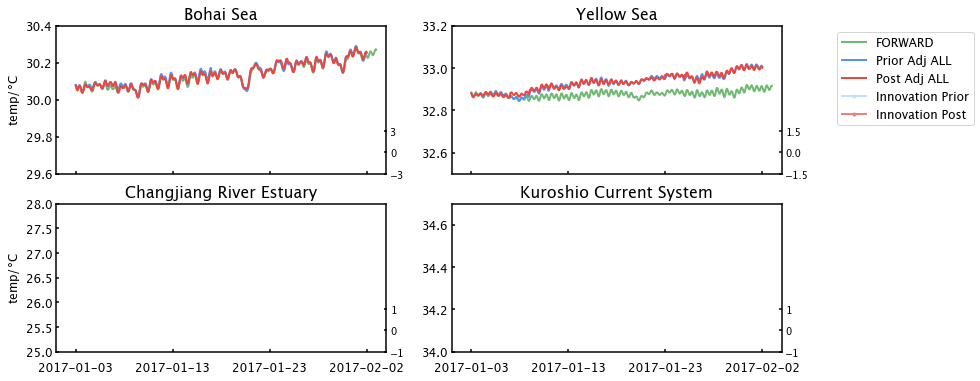

In [475]:
areas = {
         'bh': ('Bohai Sea', [29.6,30.4]),
        'ys': ('Yellow Sea', [32.5,33.2]),
        'cre': ('Changjiang River Estuary',[25,28]),
        'ks': ('Kuroshio Current System', [34.,34.7])
}
#====================================Calculate on observation grid
plt.rcParams['font.family'] = 'Lucida Grande'
# colorarray = cmaps.GMT_haxby.colors[:][:-8]
# nl_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,4)).astype(int)]
# colorarray = cmaps.cmocean_algae.colors[:][50:]
# daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray =   np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                ])/255
colorarray_blue = np.zeros([256,3])
for i in range(3):
    colorarray_blue[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
dab_color= [colorarray_blue[i,:] for i in np.ceil(np.linspace(0,len(colorarray_blue)-20,4)).astype(int)]

colorarray =   np.array(  [
                 [117,20,12],
                [140,26,17],
                [164,33,21],
                [188,39,26],
                [212,45,31],
                [233,52,37],
                [235,76,67],
                [233,52,37],
                [235,76,67],
                [237,117,113],
                [242,164,162]
                ])/255
colorarray_red = np.zeros([256,3])
for i in range(3):
    colorarray_red[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
daa_color= [colorarray_red[i,:] for i in np.ceil(np.linspace(0,len(colorarray_red)-20,4)).astype(int)]


colorarray_oran = cmaps.MPL_PRGn_r.colors[:63][:]
nl_color= [colorarray_oran[i][:] for i in np.ceil(np.linspace(0,len(colorarray_oran)-20,4)).astype(int)]

# colorarray_pi = cmaps.MPL_PRGn_r.colors[:63][:]
# dab_color= [colorarray_pi[i][:] for i in np.ceil(np.linspace(0,len(colorarray_pi)-1,4)).astype(int)]

iw=0
# obs_inarea = {}
fig = plt.figure(figsize=(13,6))
fig.tight_layout(pad=5.)
for i, (area, areainfo) in enumerate(areas.items()):
    ax = fig.add_subplot(2,2,i+1)
    
    for bnd in ax.spines.keys():
                            ax.spines[bnd].set_linewidth('1.5')
#     area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
   
#     obs_inarea[area] = np.zeros([30,len(area_index[0])])
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    # obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]
    # l1, =ax.plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(obs_inarea[area],axis=1),linewidth = 2.5,color = 'k',marker= '.',label = 'Observation')
    l2, =ax.plot(nl_Vars[area][0].ocean_time,np.nanmean(nl_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2,color = nl_color[2],label = nl_Workspaces[0].workspace_detail)
    l3, =ax.plot(dab_Vars[area][iw].ocean_time,np.nanmean(dab_Vars[area][iw].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = dab_color[2], label = 'Prior '+ dab_Workspaces[iw].workspace_detail)
   
    l4, =ax.plot(daa_Vars[area][iw].ocean_time,np.nanmean(daa_Vars[area][iw].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = daa_color[2], label = 'Post '+ daa_Workspaces[iw].workspace_detail)
   
    ax.set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax.set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    # ax.tick_params('x',labelbottom=False)
    ax.tick_params(direction = 'in', length = 3, width = 1.5, labelsize = 12)
    # ax.set_ylim([0,8])
    
    if i+1 == 1 or i+1 == 2:
        ax.tick_params('x',labelbottom=False)
    
    ax.tick_params('x',pad=10)
    
    ax.set_title('%s' %areainfo[0],fontsize =16)
    ax.set_ylim(areainfo[1])
    if i +1 ==3 or i+1 ==1: ax.set_ylabel('temp/$\degree$C',fontsize = 12)
    
    ax1={}
    if i+ 1 == 1:
        ax1[i] = fig.add_axes([0.125,0.537,0.353,0.1])
        ax1[i].set_ylim([-3,3])
        ax1[i].set_yticks([-3,0,3])
    elif i+1 ==2:
        ax1[i] = fig.add_axes([0.547,0.537,0.353,0.1])
        ax1[i].set_ylim([-1.5,1.5])
        ax1[i].set_yticks([-1.5,0,1.5])
    elif i+1 ==3:
        ax1[i] = fig.add_axes([0.125,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    elif i+1 ==4:
        ax1[i] = fig.add_axes([0.547,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    
    for bnd in ax1[i].spines.keys():
            ax1[i].spines[bnd].set_visible(False)
    # ax1[i].plot(daa_Vars[area].ocean_time,np.nanmean(daa_Vars[area].val_obsgrd[:,area_index[area][0]],axis=(1))*0,alpha=0)
    # l5, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_dnl[area][0],axis=1),linewidth =2,color= nl_color[3],marker= '.',label = 'Innovation FORWARD')
    l6, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddab[area][iw],axis=1),linewidth =2,color= dab_color[3],marker= '.',label = 'Innovation Prior')
   
    l7, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddaa[area][iw],axis=1),linewidth =2,color= daa_color[3],marker= '.',label = 'Innovation Post')
   

    ax1[i].tick_params('x',labelbottom=False)
    ax1[i].tick_params('y',labelleft=False,labelright=True)
    ax1[i].tick_params(direction='in',bottom =0, left = 0,right = 1,length = 3, width = 1.5)
    ax1[i].set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax1[i].set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    ax1[i].set_facecolor('none')
    if i+1 ==1 : ax.legend(bbox_to_anchor=(2.8, 1.0),handles=[l2,l3,l4,l6,l7],fontsize=12)
    # if i +1 ==2 or i+1 ==4: ax1[i].set_ylabel('temp/$\degree$C')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.pdf',bbox_inches='tight')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_all.jpeg',dpi=1200,bbox_inches='tight')

In [464]:
np.nanmean(nl_Vars['bh'][0].val_obsgrd[:,area_index['bh'][0]],axis=(1))

array([30.07465111, 30.06637649, 30.05909231, 30.05640308, 30.05785584,
       30.06199476, 30.06720669, 30.07218023, 30.07563666, 30.07622376,
       30.07316045, 30.0667638 , 30.0583964 , 30.0491322 , 30.0413038 ,
       30.03709394, 30.037412  , 30.04199654, 30.05014612, 30.06143286,
       30.0742443 , 30.08612185, 30.09475571, 30.09805412, 30.09502677,
       30.08810101, 30.07940586, 30.07189118, 30.06827127, 30.06847345,
       30.07075159, 30.07427082, 30.07798188, 30.08075532, 30.08073089,
       30.07727516, 30.07089126, 30.06240015, 30.05330256, 30.0463466 ,
       30.04350498, 30.0445931 , 30.04911516, 30.05663876, 30.06664247,
       30.07757277, 30.08728126, 30.09399336, 30.09692731, 30.09580653,
       30.0912024 , 30.08486429, 30.0792887 , 30.0762112 , 30.07557464,
       30.07674971, 30.07931502, 30.08241109, 30.08490439, 30.08552735,
       30.08355378, 30.07893878, 30.07246063, 30.06550919, 30.06023942,
       30.0576863 , 30.05819002, 30.06169009, 30.06776707, 30.07

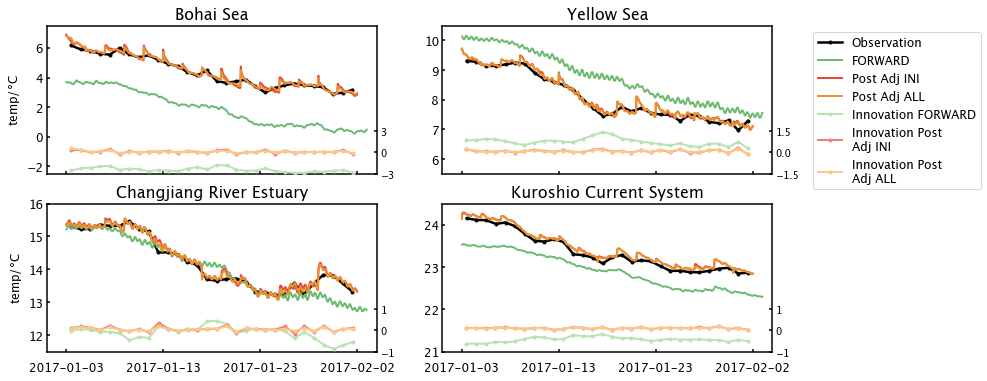

In [318]:
areas = {
         'bh': ('Bohai Sea', [-2.5,7.5]),
        'ys': ('Yellow Sea', [5.5,10.5]),
        'cre': ('Changjiang River Estuary',[11.5,16]),
        'ks': ('Kuroshio Current System', [21,24.5])
}
#====================================Calculate on observation grid
plt.rcParams['font.family'] = 'Lucida Grande'
# colorarray = cmaps.GMT_haxby.colors[:][:-8]
# nl_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,4)).astype(int)]
# colorarray = cmaps.cmocean_algae.colors[:][50:]
# daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray =   np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                ])/255
colorarray_blue = np.zeros([256,3])
for i in range(3):
    colorarray_blue[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
nl_color= [colorarray_blue[i,:] for i in np.ceil(np.linspace(0,len(colorarray_blue)-20,4)).astype(int)]

colorarray =   np.array(  [
                 [117,20,12],
                [140,26,17],
                [164,33,21],
                [188,39,26],
                [212,45,31],
                [233,52,37],
                [235,76,67],
                [233,52,37],
                [235,76,67],
                [237,117,113],
                [242,164,162]
                ])/255
colorarray_red = np.zeros([256,3])
for i in range(3):
    colorarray_red[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
daa_color= [colorarray_red[i,:] for i in np.ceil(np.linspace(0,len(colorarray_red)-20,4)).astype(int)]



colorarray_oran = cmaps.MPL_PuOr.colors[:63][:]
daa2_color= [colorarray_oran[i][:] for i in np.ceil(np.linspace(0,len(colorarray_oran)-20,4)).astype(int)]
colorarray_green = cmaps.MPL_PRGn_r.colors[:63][:]
nl_color= [colorarray_green[i][:] for i in np.ceil(np.linspace(0,len(colorarray_green)-20,4)).astype(int)]
# colorarray_pi = cmaps.MPL_PRGn_r.colors[:63][:]
# dab_color= [colorarray_pi[i][:] for i in np.ceil(np.linspace(0,len(colorarray_pi)-1,4)).astype(int)]

iw=0
# obs_inarea = {}
fig = plt.figure(figsize=(13,6))
fig.tight_layout(pad=5.)
for i, (area, areainfo) in enumerate(areas.items()):
    ax = fig.add_subplot(2,2,i+1)
    
    for bnd in ax.spines.keys():
                            ax.spines[bnd].set_linewidth('1.5')
#     area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
   
#     obs_inarea[area] = np.zeros([30,len(area_index[0])])
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    # obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]
    l1, =ax.plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(obs_inarea[area],axis=1),linewidth = 2.5,color = 'k',marker= '.',label = 'Observation')
    l2, =ax.plot(nl_Vars[area][0].ocean_time,np.nanmean(nl_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2,color = nl_color[2],label = nl_Workspaces[0].workspace_detail)
    l3, =ax.plot(dab_Vars[area][iw].ocean_time,np.nanmean(daa_Vars[area][1].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = daa_color[2], label = 'Post '+ daa_Workspaces[1].workspace_detail)
   
    l4, =ax.plot(daa_Vars[area][iw].ocean_time,np.nanmean(daa_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = daa2_color[2], label = 'Post '+ daa_Workspaces[0].workspace_detail)
   
    ax.set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax.set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    # ax.tick_params('x',labelbottom=False)
    ax.tick_params(direction = 'in', length = 3, width = 1.5, labelsize = 12)
    # ax.set_ylim([0,8])
    
    if i+1 == 1 or i+1 == 2:
        ax.tick_params('x',labelbottom=False)
    
    ax.tick_params('x',pad=10)
    
    ax.set_title('%s' %areainfo[0],fontsize =16)
    ax.set_ylim(areainfo[1])
    if i +1 ==3 or i+1 ==1: ax.set_ylabel('temp/$\degree$C',fontsize = 12)
    
    ax1={}
    if i+ 1 == 1:
        ax1[i] = fig.add_axes([0.125,0.537,0.353,0.1])
        ax1[i].set_ylim([-3,3])
        ax1[i].set_yticks([-3,0,3])
    elif i+1 ==2:
        ax1[i] = fig.add_axes([0.547,0.537,0.353,0.1])
        ax1[i].set_ylim([-1.5,1.5])
        ax1[i].set_yticks([-1.5,0,1.5])
    elif i+1 ==3:
        ax1[i] = fig.add_axes([0.125,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    elif i+1 ==4:
        ax1[i] = fig.add_axes([0.547,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    
    for bnd in ax1[i].spines.keys():
            ax1[i].spines[bnd].set_visible(False)
    # ax1[i].plot(daa_Vars[area].ocean_time,np.nanmean(daa_Vars[area].val_obsgrd[:,area_index[area][0]],axis=(1))*0,alpha=0)
    l5, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_dnl[area][0],axis=1),linewidth =2,color= nl_color[3],marker= '.',label = 'Innovation FORWARD')
    l6, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddaa[area][1],axis=1),linewidth =2,color= daa_color[3],marker= '.',label = 'Innovation Post \n'+daa_Workspaces[1].workspace_detail)
   
    l7, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddaa[area][0],axis=1),linewidth =2,color= daa2_color[3],marker= '.',label = 'Innovation Post \n'+daa_Workspaces[0].workspace_detail)
   

    ax1[i].tick_params('x',labelbottom=False)
    ax1[i].tick_params('y',labelleft=False,labelright=True)
    ax1[i].tick_params(direction='in',bottom =0, left = 0,right = 1,length = 3, width = 1.5)
    ax1[i].set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax1[i].set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    ax1[i].set_facecolor('none')
    if i+1 ==1 : ax.legend(bbox_to_anchor=(2.85, 1.0),handles=[l1,l2,l3,l4,l5,l6,l7],fontsize=12)
    # if i +1 ==2 or i+1 ==4: ax1[i].set_ylabel('temp/$\degree$C')
plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.vs.all_post.pdf',bbox_inches='tight')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.vs.all.jpeg',dpi=1200,bbox_inches='tight')

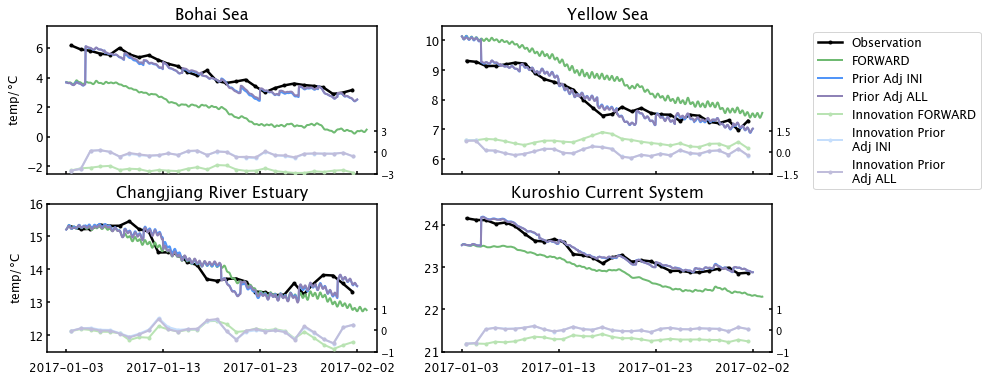

In [319]:
areas = {
         'bh': ('Bohai Sea', [-2.5,7.5]),
        'ys': ('Yellow Sea', [5.5,10.5]),
        'cre': ('Changjiang River Estuary',[11.5,16]),
        'ks': ('Kuroshio Current System', [21,24.5])
}
#====================================Calculate on observation grid
plt.rcParams['font.family'] = 'Lucida Grande'
# colorarray = cmaps.GMT_haxby.colors[:][:-8]
# nl_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,4)).astype(int)]
# colorarray = cmaps.cmocean_algae.colors[:][50:]
# daa_color= [colorarray[:][i] for i in np.ceil(np.linspace(0,len(colorarray)-1,5)).astype(int)]
colorarray =   np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                ])/255
colorarray_blue = np.zeros([256,3])
for i in range(3):
    colorarray_blue[:,i] = np.interp(np.linspace(0,1,256), 
                                     np.linspace(0,1,len(colorarray)), 
                                     colorarray[:,i].T
                                    )
dab_color= [colorarray_blue[i,:] for i in np.ceil(np.linspace(0,len(colorarray_blue)-20,4)).astype(int)]



colorarray_oran = cmaps.MPL_PuOr_r.colors[:63][:]
dab2_color= [colorarray_oran[i][:] for i in np.ceil(np.linspace(0,len(colorarray_oran)-20,4)).astype(int)]

colorarray_green = cmaps.MPL_PRGn_r.colors[:63][:]
nl_color= [colorarray_green[i][:] for i in np.ceil(np.linspace(0,len(colorarray_green)-20,4)).astype(int)]
# colorarray_pi = cmaps.MPL_PRGn_r.colors[:63][:]
# dab_color= [colorarray_pi[i][:] for i in np.ceil(np.linspace(0,len(colorarray_pi)-1,4)).astype(int)]

iw=1
# obs_inarea = {}
fig = plt.figure(figsize=(13,6))
fig.tight_layout(pad=5.)
for i, (area, areainfo) in enumerate(areas.items()):
    ax = fig.add_subplot(2,2,i+1)
    
    for bnd in ax.spines.keys():
                            ax.spines[bnd].set_linewidth('1.5')
#     area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
   
#     obs_inarea[area] = np.zeros([30,len(area_index[0])])
    # for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9):
    #     obs_thistime = obs_value[np.where(obs_time == itime)[0]]
    #     obs_inarea[it, :] = obs_thistime[area_index[0]]
    # obs_inarea[area] =   [ obs_value[np.where(obs_time == itime)[0]][area_index[0]] for it,itime in enumerate(obs_ds.survey_time.data.astype('float')/86400/1e9)]
    l1, =ax.plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(obs_inarea[area],axis=1),linewidth = 2.5,color = 'k',marker= '.',label = 'Observation')
    l2, =ax.plot(nl_Vars[area][0].ocean_time,np.nanmean(nl_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2,color = nl_color[2],label = nl_Workspaces[0].workspace_detail)
    l3, =ax.plot(dab_Vars[area][iw].ocean_time,np.nanmean(dab_Vars[area][1].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = dab_color[2], label = 'Prior '+ daa_Workspaces[1].workspace_detail)
   
    l4, =ax.plot(daa_Vars[area][iw].ocean_time,np.nanmean(dab_Vars[area][0].val_obsgrd[:,area_index[area][0]],axis=(1)),
                 linewidth = 2, color = dab2_color[2], label = 'Prior '+ daa_Workspaces[0].workspace_detail)
   
    ax.set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax.set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    # ax.tick_params('x',labelbottom=False)
    ax.tick_params(direction = 'in', length = 3, width = 1.5, labelsize = 12)
    # ax.set_ylim([0,8])
    
    if i+1 == 1 or i+1 == 2:
        ax.tick_params('x',labelbottom=False)
    
    ax.tick_params('x',pad=10)
    
    ax.set_title('%s' %areainfo[0],fontsize =16)
    ax.set_ylim(areainfo[1])
    if i +1 ==3 or i+1 ==1: ax.set_ylabel('temp/$\degree$C',fontsize = 12)
    
    ax1={}
    if i+ 1 == 1:
        ax1[i] = fig.add_axes([0.125,0.537,0.353,0.1])
        ax1[i].set_ylim([-3,3])
        ax1[i].set_yticks([-3,0,3])
    elif i+1 ==2:
        ax1[i] = fig.add_axes([0.547,0.537,0.353,0.1])
        ax1[i].set_ylim([-1.5,1.5])
        ax1[i].set_yticks([-1.5,0,1.5])
    elif i+1 ==3:
        ax1[i] = fig.add_axes([0.125,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    elif i+1 ==4:
        ax1[i] = fig.add_axes([0.547,0.125,0.353,0.1])
        ax1[i].set_ylim([-1,1])
        ax1[i].set_yticks([-1,0,1])
    
    for bnd in ax1[i].spines.keys():
            ax1[i].spines[bnd].set_visible(False)
    # ax1[i].plot(daa_Vars[area].ocean_time,np.nanmean(daa_Vars[area].val_obsgrd[:,area_index[area][0]],axis=(1))*0,alpha=0)
    l5, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_dnl[area][0],axis=1),linewidth =2,color= nl_color[3],marker= '.',label = 'Innovation FORWARD')
    l6, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddab[area][1],axis=1),linewidth =2,color= dab_color[3],marker= '.',label = 'Innovation Prior \n'+daa_Workspaces[1].workspace_detail)
   
    l7, =ax1[i].plot(obs_ds.survey_time.data.astype('float')/86400/1e9,np.nanmean(onobstime_ddab[area][0],axis=1),linewidth =2,color= dab2_color[3],marker= '.',label = 'Innovation Prior \n'+daa_Workspaces[0].workspace_detail)
   

    ax1[i].tick_params('x',labelbottom=False)
    ax1[i].tick_params('y',labelleft=False,labelright=True)
    ax1[i].tick_params(direction='in',bottom =0, left = 0,right = 1,length = 3, width = 1.5)
    ax1[i].set_xticks(daa_Vars[area][iw].ocean_time[0::240].astype('float')/86400/1e9)
    ax1[i].set_xlim([daa_Vars[area][iw].ocean_time[0].astype('float')/86400/1e9-2,
                 daa_Vars[area][iw].ocean_time[-1].astype('float')/86400/1e9+2])
    ax1[i].set_facecolor('none')
    if i+1 ==1 : ax.legend(bbox_to_anchor=(2.85, 1.0),handles=[l1,l2,l3,l4,l5,l6,l7],fontsize=12)
    # if i +1 ==2 or i+1 ==4: ax1[i].set_ylabel('temp/$\degree$C')
plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.vs.all_prior.pdf',bbox_inches='tight')
# plt.savefig('roms_i4dvar_valid_obsgrd_adj_ini.vs.all.jpeg',dpi=1200,bbox_inches='tight')

In [ ]:
obs_time

In [323]:
# ys 
# lon_bdy = [122,128];
# lat_bdy = [34,38];
# vmin_sst = 6
# vmax_sst = 12
# cre
# lon_bdy = [119.5,128.5];
# lat_bdy = [27,35];
# vmin_sst = 11
# vmax_sst = 18
# bh 
# lon_bdy = [116.5,123.5];
# lat_bdy = [36,42];
# vmin_sst = 0
# vmax_sst = 8
# ks 
lon_bdy = [120,133.5];
lat_bdy = [20,31];
vmin_sst = 22
vmax_sst = 26
my_sst_color = sio.loadmat('LYG_rainbow.mat')['rainbow']
my_sst = LinearSegmentedColormap.from_list('sst',my_sst_color, N = 256)
my_div_color = np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                [255,255,255],
                [250,224,224],
                [242,164,162],
                [237,117,113],
                [235,76,67],
                [233,52,37],
                [212,45,31],
                [188,39,26],
                [164,33,21],
                [140,26,17],
                [117,20,12]
                ])/255
my_div = LinearSegmentedColormap.from_list('div',my_div_color, N = 256)
figsize = (11,9)
markersize = 10
iw = 1
plt.rcParams['font.family'] = 'Lucida Grande'
# area = 'ks'
for area in ['bh','ys','cre','ks','all']:
# for area in ['all']:
    if area == 'bh':
        lon_bdy = [116.5,123.5];
        lat_bdy = [36,42];
        lon_interval = 3
        lat_interval = 3
        vmin_sst = 0
        vmax_sst = 8
        markersize = 15
    elif area == 'ys':
        lon_bdy = [122,128];
        lat_bdy = [34,38];
        lon_interval = 2
        lat_interval = 2
        vmin_sst = 6
        vmax_sst = 12
        markersize = 20
    elif area == 'cre':
        lon_bdy = [119.5,130.5];
        lat_bdy = [27,35];
        lon_interval = 3
        lat_interval = 3
        vmin_sst = 11
        vmax_sst = 18
    elif area == 'ks':
        lon_bdy = [120,133.5];

        lat_bdy = [20,31];
        lon_interval = 4
        lat_interval = 3
        vmin_sst = 22
        vmax_sst = 26
    elif area =='all':
        lon_bdy = [116,136];
        lat_bdy = [21,38.5];
        lon_interval = 5
        lat_interval = 5
        vmin_sst = 0
        vmax_sst = 25
    for it in range(len(obs_ds.survey_time.data)):
    # for it in [2]:
        fig = plt.figure(figsize=figsize, constrained_layout = True)
        #===============================observation spatial pattern
        ax = fig.add_subplot(3,3,1,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
        ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   obs_inarea[area][it][:],
                   cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        ax.set_title('Observation',fontsize=16)
        fig.text(0.12,0.32,str(obs_ds.survey_time.data[it])[:10]+'-12H',fontsize = 12)
        #===============================posterior spatial pattern
        ax = fig.add_subplot(3,3,2,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)

        c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]],

                   cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        ax.set_title('Posterior',fontsize=16)

                #==== colobar
        # position=fig.add_axes([ 0.1875,0.12, 0.325, 0.045,])


        # cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(6,14,2))
        # for bnd in position.spines.keys():
        #         position.spines[bnd].set_linewidth('1.5')
        # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

        # cb.set_label('$\degree$C',fontsize = 12) 
        #===============================innovation spatial pattern
        ax = fig.add_subplot(3,3,3,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   # daa_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]]-obs_inarea[area][it][:],
                    onobstime_ddaa[area][iw][it,:],
                   marker='s',
                   vmin = -2, vmax = 2, cmap=my_div,
                   transform = ccrs.PlateCarree())
        ax.set_title('Innovation',fontsize=16)
            #---- colrbar
        # position=fig.add_axes([ 0.7575,0.12, 0.165, 0.045,])


        # cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
        # for bnd in position.spines.keys():
        #         position.spines[bnd].set_linewidth('1.5')
        # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
        # cb2.set_label('$\degree$C',fontsize = 12) 
        # fig.colorbar(c3)
        # plt.savefig('roms_i4dvar_valid2d_obsgrd_adj_ini.pdf',bbox_inches='tight')

        # fig = plt.figure(figsize=figsize, constrained_layout = True)

        #===============================observation spatial pattern
        ax = fig.add_subplot(3,3,4,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
        ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   obs_inarea[area][it][:],
                   cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        # ax.set_title('Observation',fontsize=16)
        
        #===============================posterior spatial pattern
        ax = fig.add_subplot(3,3,5,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)

        c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   dab_Vars[area][iw].val_obsgrd[11+24*it,area_index[area]],

                   cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        ax.set_title('Prior',fontsize=16)

                #==== colobar
        # position=fig.add_axes([ 0.1875,0.12, 0.325, 0.045,])


        # cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(6,14,2))
        # for bnd in position.spines.keys():
        #         position.spines[bnd].set_linewidth('1.5')
        # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

        # cb.set_label('$\degree$C',fontsize = 12) 
        #===============================innovation spatial pattern
        ax = fig.add_subplot(3,3,6,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   onobstime_ddab[area][iw][it,:],
                   marker='s',
                   vmin = -2, vmax = 2, cmap=my_div,
                   transform = ccrs.PlateCarree())
        ax.set_title('Innovation',fontsize=16)
            #---- colrbar
        # position=fig.add_axes([ 0.7575,0.12, 0.165, 0.045,])


        # cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
        # for bnd in position.spines.keys():
        #         position.spines[bnd].set_linewidth('1.5')
        # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
        # cb2.set_label('$\degree$C',fontsize = 12) 
        # fig.colorbar(c3)
        # plt.savefig('roms_i4dvar_valid2d_obsgrd_adj_ini.pdf',bbox_inches='tight')

        # fig = plt.figure(figsize=figsize, constrained_layout = True)

        #===============================observation spatial pattern
        ax = fig.add_subplot(3,3,7,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)

        # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
        ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   obs_inarea[area][it][:],
                   cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        # ax.set_title('Observation',fontsize=16)
        #===============================posterior spatial pattern
        ax = fig.add_subplot(3,3,8,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('y',labelleft=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   onobstime_nl[area][0][it,:],

                   cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
                   marker='s',
                   transform = ccrs.PlateCarree())
        ax.set_title('FORWARD',fontsize=16)
                #==== colobar
        position=fig.add_axes([ 0.1875,-0.05, 0.325, 0.025,])


        cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(vmin_sst,vmax_sst+2,2))
        for bnd in position.spines.keys():
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

        cb.set_label('$\degree$C',fontsize = 12) 
        #===============================innovation spatial pattern
        ax = fig.add_subplot(3,3,9,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('y',labelleft=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
                   markersize,
                   onobstime_dnl[area][0][it,:],
                   marker='s',
                   vmin = -2, vmax = 2, cmap=my_div,
                   transform = ccrs.PlateCarree())
        ax.set_title('Innovation',fontsize=16)
            #---- colrbar
        position=fig.add_axes([ 0.7575,-0.05, 0.165, 0.025,])


        cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
        for bnd in position.spines.keys():
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
        cb2.set_label('$\degree$C',fontsize = 12) 
        # fig.colorbar(c3)
        plt.savefig('./valid_fig/%s/%s.jpeg'%(area,str(it+1)),dpi=600,bbox_inches='tight')
        plt.close()

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


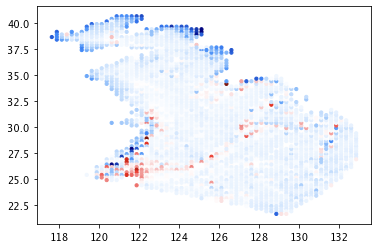

In [311]:
plt.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],10,onobstime_dab[area][iw][1,:]-onobstime_nl[area][iw][1,:],cmap=my_div)

In [298]:
np.nanmean(onobstime_nl[area][iw][0,:])

17.702552900481205

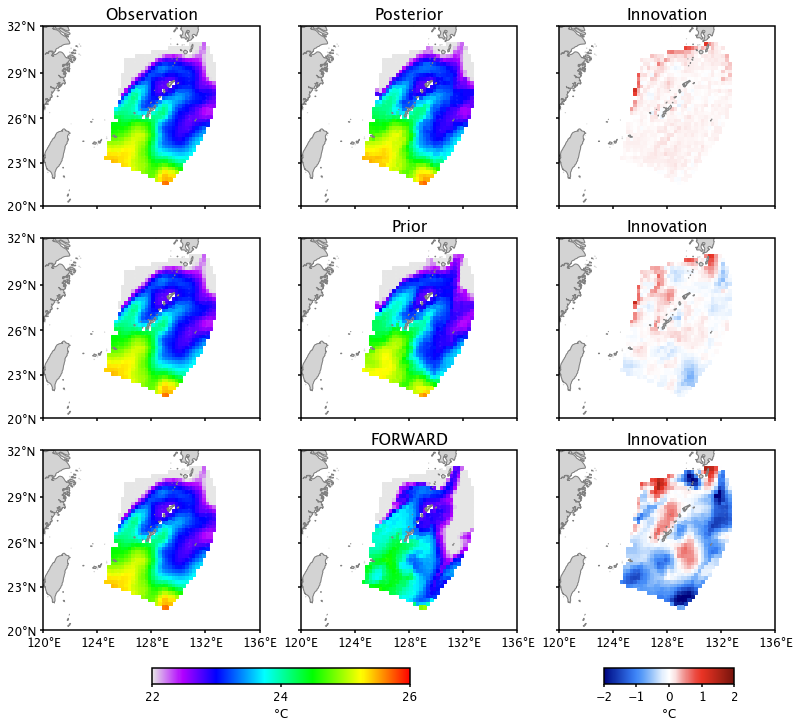

In [359]:
area = 'ks'
markersize = 10
draw_cb = True
# ys 
# lon_bdy = [122,128];
# lat_bdy = [34,38];
# lon_interval = 2
# lat_interval = 2
# vmin_sst = 6
# vmax_sst = 12
# cre
# lon_bdy = [119.5,130.5];
# lat_bdy = [27,35];
# lon_interval = 3
# lat_interval = 3
# vmin_sst = 11
# vmax_sst = 18
# bh 
# lon_bdy = [116.5,123.5];
# lat_bdy = [36,42];
# lon_interval = 3
# lat_interval = 3
# vmin_sst = 0
# vmax_sst = 8
# ks 
# lon_bdy = [120,133.5];

# lat_bdy = [20,31];
# lon_interval = 4
# lat_interval = 3
# vmin_sst = 22
# vmax_sst = 26
#all
# lon_bdy = [116,136];
# lat_bdy = [21,38.5];
# lon_interval = 5
# lat_interval = 5
# vmin_sst = 0
# vmax_sst = 25
if area == 'bh':
    lon_bdy = [116.5,123.5];
    lat_bdy = [36,42];
    lon_interval = 3
    lat_interval = 3
    vmin_sst = 0
    vmax_sst = 8
elif area == 'ys':
    lon_bdy = [122,128];
    lat_bdy = [34,38];
    lon_interval = 2
    lat_interval = 2
    vmin_sst = 6
    vmax_sst = 12
elif area == 'cre':
    lon_bdy = [119.5,130.5];
    lat_bdy = [27,35];
    lon_interval = 3
    lat_interval = 3
    vmin_sst = 11
    vmax_sst = 18
elif area == 'ks':
    lon_bdy = [120,133.5];

    lat_bdy = [20,31];
    lon_interval = 4
    lat_interval = 3
    vmin_sst = 22
    vmax_sst = 26
elif area =='all':
    lon_bdy = [116,136];
    lat_bdy = [21,38.5];
    lon_interval = 5
    lat_interval = 5
    vmin_sst = 0
    vmax_sst = 25
my_sst_color = sio.loadmat('LYG_rainbow.mat')['rainbow']
my_sst = LinearSegmentedColormap.from_list('sst',my_sst_color, N = 256)
my_div_color = np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                [255,255,255],
                [250,224,224],
                [242,164,162],
                [237,117,113],
                [235,76,67],
                [233,52,37],
                [212,45,31],
                [188,39,26],
                [164,33,21],
                [140,26,17],
                [117,20,12]
                ])/255
my_div = LinearSegmentedColormap.from_list('div',my_div_color, N = 256)
figsize = (11,9)


plt.rcParams['font.family'] = 'Lucida Grande'
iwda = 1
iwnl = 0
for it in range(1):
    fig = plt.figure(figsize=figsize, constrained_layout = True)
    #===============================observation spatial pattern
    ax = fig.add_subplot(3,3,1,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
    ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_obs[area],
               cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    ax.set_title('Observation',fontsize=16)
    # fig.text(0.12,0.49,str(obs_ds.survey_time.data[it])[:10]+'-12H',fontsize = 12)
    #===============================posterior spatial pattern
    ax = fig.add_subplot(3,3,2,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    ax.tick_params('y',labelleft=False)
    
    c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_daa[area][iwda],

               cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    ax.set_title('Posterior',fontsize=16)
    
            #==== colobar
    # position=fig.add_axes([ 0.1875,0.12, 0.325, 0.045,])


    # cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(6,14,2))
    # for bnd in position.spines.keys():
    #         position.spines[bnd].set_linewidth('1.5')
    # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

    # cb.set_label('$\degree$C',fontsize = 12) 
    #===============================innovation spatial pattern
    ax = fig.add_subplot(3,3,3,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    ax.tick_params('y',labelleft=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_ddaa[area][iwda],
               marker='s',
               vmin = -2, vmax = 2, cmap=my_div,
               transform = ccrs.PlateCarree())
    ax.set_title('Innovation',fontsize=16)
        #---- colrbar
    # position=fig.add_axes([ 0.7575,0.12, 0.165, 0.045,])


    # cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
    # for bnd in position.spines.keys():
    #         position.spines[bnd].set_linewidth('1.5')
    # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
    # cb2.set_label('$\degree$C',fontsize = 12) 
    # fig.colorbar(c3)
    # plt.savefig('roms_i4dvar_valid2d_obsgrd_adj_ini.pdf',bbox_inches='tight')

    # fig = plt.figure(figsize=figsize, constrained_layout = True)
    ax = fig.add_subplot(3,3,4,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
    ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_obs[area],
               cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    # ax.set_title('Observation',fontsize=16)
    # fig.text(0.12,0.49,str(obs_ds.survey_time.data[it])[:10]+'-12H',fontsize = 12)
    #===============================posterior spatial pattern
    ax = fig.add_subplot(3,3,5,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    ax.tick_params('y',labelleft=False)
    
    c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_dab[area][iwda],

               cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    ax.set_title('Prior',fontsize=16)
    
            #==== colobar
    # position=fig.add_axes([ 0.1875,0.12, 0.325, 0.045,])


    # cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(6,14,2))
    # for bnd in position.spines.keys():
    #         position.spines[bnd].set_linewidth('1.5')
    # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

    # cb.set_label('$\degree$C',fontsize = 12) 
    #===============================innovation spatial pattern
    ax = fig.add_subplot(3,3,6,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('x',labelbottom=False)
    ax.tick_params('y',labelleft=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_ddab[area][iwda],
               marker='s',
               vmin = -2, vmax = 2, cmap=my_div,
               transform = ccrs.PlateCarree())
    ax.set_title('Innovation',fontsize=16)
        #---- colrbar
    # position=fig.add_axes([ 0.7575,0.12, 0.165, 0.045,])


    # cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
    # for bnd in position.spines.keys():
    #         position.spines[bnd].set_linewidth('1.5')
    # position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
    # cb2.set_label('$\degree$C',fontsize = 12) 
    # fig.colorbar(c3)
    # plt.savefig('roms_i4dvar_valid2d_obsgrd_adj_ini.pdf',bbox_inches='tight')

    # fig = plt.figure(figsize=figsize, constrained_layout = True)

    #===============================observation spatial pattern
    ax = fig.add_subplot(3,3,7,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)

    # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
    ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_obs[area],
               cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    # ax.set_title('Observation',fontsize=16)
    #===============================posterior spatial pattern
    ax = fig.add_subplot(3,3,8,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('y',labelleft=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    c2=ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_nl[area],

               cmap = my_sst, vmin = vmin_sst,vmax=vmax_sst,
               marker='s',
               transform = ccrs.PlateCarree())
    ax.set_title('FORWARD',fontsize=16)
            #==== colobar
    if draw_cb:
        position=fig.add_axes([ 0.1875,-0.05, 0.325, 0.025,])


        cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(vmin_sst,vmax_sst+2,2))
        for bnd in position.spines.keys():
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

        cb.set_label('$\degree$C',fontsize = 12) 
    #===============================innovation spatial pattern
    ax = fig.add_subplot(3,3,9,projection = ccrs.Mercator())
    for bnd in ax.spines.keys():
        ax.spines[bnd].set_linewidth('1.5')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
    ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)
    ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.0f',
                                    degree_symbol='°',
                                    dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.0f',
                                        degree_symbol='°')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
    ax.tick_params('y',labelleft=False)
    # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
    c3 = ax.scatter(obs_location[area_index[area],0],obs_location[area_index[area],1],
               markersize,
               timemean_dnl[area],
               marker='s',
               vmin = -2, vmax = 2, cmap=my_div,
               transform = ccrs.PlateCarree())
    ax.set_title('Innovation',fontsize=16)
        #---- colrbar
    if draw_cb:
        position=fig.add_axes([ 0.7575,-0.05, 0.165, 0.025,])


        cb2 = fig.colorbar(c3, cax = position, orientation='horizontal',ticks = np.arange(-2,3,1))
        for bnd in position.spines.keys():
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
        cb2.set_label('$\degree$C',fontsize = 12) 
        # fig.colorbar(c3)
    plt.savefig('./valid_fig/%s/romsi4dvar_valid2d_obsgrd_adj_ini_timemean.jpeg'%(area),dpi=1200,bbox_inches='tight')
    # plt.close()

In [455]:
# ys 
# lon_bdy = [122,128];
# lat_bdy = [34,38];
# vmin_sst = 6
# vmax_sst = 12
# cre
# lon_bdy = [119.5,128.5];
# lat_bdy = [27,35];
# vmin_sst = 11
# vmax_sst = 18
# bh 
# lon_bdy = [116.5,123.5];
# lat_bdy = [36,42];
# vmin_sst = 0
# vmax_sst = 8
# ks 
lon_bdy = [120,133.5];
lat_bdy = [20,31];
vmin_sst = 22
vmax_sst = 26
my_sst_color = sio.loadmat('LYG_rainbow.mat')['rainbow']
my_sst = LinearSegmentedColormap.from_list('sst',my_sst_color, N = 256)
my_div_color = np.array(  [
                 [0,0,123],
                [9,32,154],
                [22,58,179],
                [34,84,204],
                [47,109,230],
                [63,135,247],
                [95,160,248],
                [137,186,249],
                [182,213,251],
                [228,240,254],
                [255,255,255],
                [250,224,224],
                [242,164,162],
                [237,117,113],
                [235,76,67],
                [233,52,37],
                [212,45,31],
                [188,39,26],
                [164,33,21],
                [140,26,17],
                [117,20,12]
                ])/255
my_div = LinearSegmentedColormap.from_list('div',my_div_color, N = 256)
figsize = (11,5)
markersize = 10
iw = 1
plt.rcParams['font.family'] = 'Lucida Grande'
# area = 'ks'
for area in ['bh','ys','cre','ks','all']:
# for area in ['bh']:
    if area == 'bh':
        lon_bdy = [116.5,123.5];
        lat_bdy = [36,42];
        lon_interval = 3
        lat_interval = 3
        vmin_sst = 0
        vmax_sst = 8
        vmin_diff = -5
        vmax_diff = 5
        markersize = 15
        bc = 0.98
    elif area == 'ys':
        lon_bdy = [122,128];
        lat_bdy = [34,38];
        lon_interval = 2
        lat_interval = 2
        vmin_sst = 6
        vmax_sst = 12
        vmin_diff = -3
        vmax_diff = 3
        markersize = 20
        bc = 0.978
    elif area == 'cre':
        lon_bdy = [119.5,130.5];
        lat_bdy = [27,35];
        lon_interval = 3
        lat_interval = 3
        vmin_sst = 11
        vmax_sst = 18
        vmin_diff = -3
        vmax_diff = 3
        bc = 0.965
    elif area == 'ks':
        lon_bdy = [120,133.5];

        lat_bdy = [20,31];
        lon_interval = 4
        lat_interval = 3
        vmin_sst = 22
        vmax_sst = 26
        vmin_diff = -3
        vmax_diff = 3
        bc = 0.965
    elif area =='all':
        lon_bdy = [116,136];
        lat_bdy = [21,38.5];
        lon_interval = 5
        lat_interval = 5
        vmin_sst = 0
        vmax_sst = 25
        vmin_diff = -3
        vmax_diff = 3
        bc = 0.93
    for it in range(len(daa_Vars[area][iwda].ocean_time)):
    # for it in range(1):
        fig = plt.figure(figsize=figsize, constrained_layout = True)
        #===============================observation spatial pattern
        ax = fig.add_subplot(1,3,1,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1,)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = 1,)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        # ax.tick_params('x',labelbottom=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        # ax.scatter(obs_location[area_index,0],obs_location[area_index,1],10,daa_Vars['ys'].val_obsgrd[11,area_index],marker='s',transform = ccrs.PlateCarree())
        ax.pcolormesh(nl_Vars[area][iwnl].lon,nl_Vars[area][iwnl].lat,
                       0.5*(nl_Vars[area][iwnl].value[it,:,:]+nl_Vars[area][iwnl].value[it+1,:,:]),
                   cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
                   
                   transform = ccrs.PlateCarree(),zorder = -1)
        ax.set_title('Forward',fontsize=16)
        ax.text(lon_bdy[-1]*bc,lat_bdy[-1]*0.99,str(daa_Vars[area][iwda].ocean_time.data[it])[:10]+'-%sH'%(str(daa_Vars[area][iwda].ocean_time.data[it])[11:13]),fontsize = 12,transform = ccrs.PlateCarree())
        #===============================posterior spatial pattern
        ax = fig.add_subplot(1,3,2,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = 1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)

        c2=ax.pcolormesh(daa_Vars[area][iwnl].lon,daa_Vars[area][iwnl].lat,
                       daa_Vars[area][iwnl].value[it,:,:],
                   cmap = my_sst,vmin = vmin_sst,vmax=vmax_sst,
                   
                   transform = ccrs.PlateCarree(),zorder = -1)
        ax.set_title('Posterior',fontsize=16)

                #==== colobar
        
        position=fig.add_axes([ 0.1875,0.0, 0.325, 0.045,])
        cb = fig.colorbar(c2, cax = position, orientation='horizontal',ticks = np.arange(vmin_sst,vmax_sst+2,2))
        for bnd in position.spines.keys():
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)

        cb.set_label('$\degree$C',fontsize = 12) 
        #===============================innovation spatial pattern
        ax = fig.add_subplot(1,3,3,projection = ccrs.Mercator())
        for bnd in ax.spines.keys():
            ax.spines[bnd].set_linewidth('1.5')
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
        ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = 1)
        ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
        ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+lon_interval,lon_interval),crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1]+lat_interval,lat_interval),crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.0f',
                                        degree_symbol='°',
                                        dateline_direction_label=True)
        lat_formatter = LatitudeFormatter(number_format='.0f',
                                            degree_symbol='°')
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.tick_params(direction = 'out', length = 3, width = 1.5, labelsize = 12)
        ax.tick_params('x',labelbottom=False)
        ax.tick_params('y',labelleft=False)
        # area_index = np.where(~np.isnan(daa_Vars[area].val_obsgrd[0,:]))
        cb3 = ax.pcolormesh(daa_Vars[area][iwnl].lon,daa_Vars[area][iwnl].lat,
                       daa_Vars[area][iwnl].value[it,:,:]-
                           0.5*(nl_Vars[area][iwnl].value[it,:,:]+nl_Vars[area][iwnl].value[it+1,:,:]),
                   cmap = my_div,vmin =vmin_diff,vmax=vmax_diff,
                   
                   transform = ccrs.PlateCarree(),zorder = -1)
        ax.set_title('Difference',fontsize=16)
            #---- colrbar
        
        position=fig.add_axes([ 0.7575,0.0, 0.165, 0.045,])


        cb2 = fig.colorbar(cb3, cax = position, orientation='horizontal',ticks = np.arange(vmin_diff,vmax_diff+vmax_diff,vmax_diff))
        for bnd in position.spines.keys(): 
                position.spines[bnd].set_linewidth('1.5')
        position.tick_params(direction = 'out',  length = 3, width = 1.5, labelsize = 12)
        cb2.set_label('$\degree$C',fontsize = 12) 
        # fig.colorbar(c3)
        # plt.savefig('roms_i4dvar_valid2d_obsgrd_adj_ini.pdf',bbox_inches='tight')

        # fig = plt.figure(figsize=figsize, constrained_layout = True)

        #===============================observation spatial pattern
        
        plt.savefig('./fig_evolution/sst/%s/%s.jpeg'%(area,str(it+1)),dpi=300,bbox_inches='tight')
        plt.close()

/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/onecountrylee/opt/anaconda3/envs/m1base/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/onecountrylee/opt/anacond

121.03

In [ ]:
fig = plt.figure(figsize=(5,5), constrained_layout = True)
ax = fig.add_subplot(projection = ccrs.Mercator())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)

ax.pcolor(daa_Vars['cre'].value[0,:,:])


In [ ]:
fig = plt.figure(figsize=(5,5), constrained_layout = True)
ax = fig.add_subplot(projection = ccrs.Mercator())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)

area_index = np.where(~np.isnan(daa_Vars['cre'].val_obsgrd[0,:]))
obs_crt = obs_value[np.where(obs_time == 17169.5)[0]]
c = ax.scatter(obs_location[area_index,0],obs_location[area_index,1],20,
               daa_Vars['cre'].val_obsgrd[11,area_index]-obs_crt[area_index],
               marker='s', vmin = -2, vmax =2,
               transform = ccrs.PlateCarree())
plt.colorbar(c)

In [ ]:
fig = plt.figure(figsize=(5,5), constrained_layout = True)
ax = fig.add_subplot(projection = ccrs.Mercator())
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'gray',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='lightgray',zorder = -1)

area_index = np.where(~np.isnan(daa_Vars['ys'].val_obsgrd[0,:]))
obs_crt = obs_value[np.where(obs_time == 17169.5)[0]]
c = ax.scatter(obs_location[area_index,0],obs_location[area_index,1],20,
               nl_Vars['ys'].val_obsgrd[3,area_index]-obs_crt[area_index],
               marker='s', vmin = -2, vmax =2,
               transform = ccrs.PlateCarree())
plt.colorbar(c)